<a href="https://colab.research.google.com/github/armandossrecife/my_validation/blob/main/my_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Compara os Repositórios

**Analisa os commits e issues dos repositórios (Cassandra, Kafka, ActiveMQ e Hadoop) para checar as  classes impactadas por ATD:**

| id | Property | RP1 | RP2 | RP3 | RP4 |
|---|---|---|---|---|---|
| 1 | name | [Cassandra](https://github.com/apache/cassandra) | [Kafka](https://github.com/apache/kafka) | [ActiveMQ](https://github.com/apache/activemq) | [Hadoop](https://github.com/apache/hadoop) |
| 2 | files | 4998 | 5648 | 5174 | 14970 |
| 3 | LOC files | 1055561 | 874543 | 466706 | 4323485 |
| 4 | java files | 4459 | 4350 | 4367 | 11811 |
| 5 | LOC java | 680827 | 649612 | 417291 | 1889967 |
| 6 | QTD commits | 29142 | 11810 | 11537 | 26945 |
| 7 | QTD releases | 297 | 65 | 85 | 374 |
| 8 | Life span (years) | 14.53 | 12 | 14 | 14 |
| 9 | stars | 8200 | 26100 | 2200 | 13900 |
| 10 | forks | 3500 | 13000 | 1400 | 8600 |
| 11 | colaborators | 426 | 1062 | 130 | 552 |
| 12 | QTD Issues   | 18635 | 14326 | 5955 | 12247 |
| 13 | Version      | 2023/10/04 | 2023/10/04 | 2023/10/04 | 2023/10/04 |

[ATDCodeAnalyzer](https://github.com/Technical-Debt-Large-Scale/atdcodeanalyzer/blob/main/docs/diagrams/AnalysisCassandraRepositoryFlow.png): método para identificar classes impactadas por ATD

**Cassandra Critical Classe**s: ['StorageService.java', 'ColumnFamilyStore.java','DatabaseDescriptor.java','CompactionManager.java','StorageProxy.java','SSTableReader.java','Config.java','CassandraDaemon.java','SelectStatement.java','SinglePartitionReadCommand.java','NodeProbe.java','MessagingService.java']

**Kafka Critical Classes**: ['StreamThread.java', 'KafkaConsumer.java', 'StreamTask.java', 'Fetcher.java', 'KafkaStreams.java','KStreamImpl.java', 'KafkaProducer.java','StreamsConfig.java', 'ConsumerCoordinator.java']

**ActiveMQ Critical Classes**: ['DemandForwardingBridgeSupport.java',
'SubQueueSelectorCacheBroker.java','BrokerServiceAware.java','TransportConnector.java','BrokerService.java','TopicSubscription.java','QueueBrowserSubscription.java','Queue.java','DurableTopicSubscription.java','QueueSubscription.java','QueueDispatchSelector.java','PendingQueueMessageStoragePolicy.java','MirroredQueue.java','MessageQueue.java']

**Hadoop Critical Classes**: ['Configuration.java', 'Writable.java', 'StringUtils.java', 'FSDataOutputStream.java', 'BytesWritable.java', 'WritableComparable.java', 'DatanodeProtocol.java', 'ClientProtocol.java', 'FSNamesystem.java', 'DataNode.java','BlockManager.java', 'ResourceScheduler.java', 'ContainerManager.java', 'FairScheduler.java','CapacityScheduler.java', 'NodeManager.java', 'Job.java', 'Mapper.java', 'Reducer.java', 'InputFormat.java', 'OutputFormat.java']

# Setup do Ambiente

In [5]:
!pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7026 sha256=726c38c057ebcd89829b84b801a9ede667dc84ba7178c61393ed216fd65e6358
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


## Funções de apoio

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import regex as re
import numpy as np
from scipy.stats import mannwhitneyu
import pingouin
import matplotlib.lines as mlines

def show_pie(my_df, my_field, my_title):
  type_counts = my_df[my_field].value_counts().sort_values(ascending=False)
  type_percentages = type_counts / type_counts.sum() * 100

  plt.pie(type_percentages, labels=type_counts.index, autopct="%.1f%%")
  plt.title(my_title)
  plt.show()
  for i in range(len(type_counts)):
    print(type_counts.index[i], type_counts[i])

def find_issues_id_by_project(input_string: str, project: str) -> list[str]:
    """Finds all Project issue ID patterns in the input string.
    Args:
        input_string: The input string.
        project: The pattern related to project name, for example: CASSANDRA project name
    Returns:
        A list of project issue IDs, if found; otherwise, an empty list.
    """
    # Try to find all Cassandra issue ID patterns in the input string
    matches = re.findall(r"({0}-\d+)".format(project), input_string)
    # Return an empty list if no matches are found
    if not matches:
        return []
    # Convert the list of matches to a set to remove duplicates
    set_matches = set(matches)
    # Convert the set of matches back to a list
    list_unique_matches = list(set_matches)

    # Return the list of matched Cassandra issue IDs
    return list_unique_matches

# TODO: corrigir a coluna hahs para hash nos arquivos .xslx
def generate_relacao_commits_issues(filtered_df, my_project):
  relacao_commit_lista_issues = []
  for index in filtered_df.index:
    if len(find_issues_id_by_project(input_string=filtered_df.msg[index], project=my_project))>0:
      elemento = filtered_df.hahs[index], find_issues_id_by_project(input_string=filtered_df.msg[index], project=my_project)
      relacao_commit_lista_issues.append(elemento)

  l_hash, l_issues = [], []
  for each in relacao_commit_lista_issues:
    issues_separados_por_virgula = ",".join(each[1])
    l_hash.append(each[0])
    l_issues.append(issues_separados_por_virgula)

  dict_relacao_commit_issues = {
    'hahs':l_hash,
    'lista_issues':l_issues
  }

  df_relacao_commit_issues = pd.DataFrame(dict_relacao_commit_issues)
  return df_relacao_commit_issues

def generate_relacao_commits_issues2(filtered_df, my_project):
  relacao_commit_lista_issues = []
  for index in filtered_df.index:
    if len(find_issues_id_by_project(input_string=filtered_df.msg[index], project=my_project))>0:
      elemento = filtered_df.hash[index], find_issues_id_by_project(input_string=filtered_df.msg[index], project=my_project)
      relacao_commit_lista_issues.append(elemento)

  l_hash, l_issues = [], []
  for each in relacao_commit_lista_issues:
    issues_separados_por_virgula = ",".join(each[1])
    l_hash.append(each[0])
    l_issues.append(issues_separados_por_virgula)

  dict_relacao_commit_issues = {
    'hash':l_hash,
    'lista_issues':l_issues
  }

  df_relacao_commit_issues = pd.DataFrame(dict_relacao_commit_issues)
  return df_relacao_commit_issues

def merge_comits_issues(df_commits_arquivos_criticos, lista_issues_architectural_impact_yes, project):
	df_commits_issues = generate_relacao_commits_issues(filtered_df=df_commits_arquivos_criticos, my_project=project)
	df_commits_issues_architectural_impact = df_commits_issues[df_commits_issues['lista_issues'].isin(lista_issues_architectural_impact_yes)]
	lista_commits_com_architectural_impact = df_commits_issues_architectural_impact.hahs.to_list()
	df__commits_only_architectural_impact = df_commits_arquivos_criticos[df_commits_arquivos_criticos['hahs'].isin(lista_commits_com_architectural_impact)]
	df_commits_issues_with_ai = pd.merge(df__commits_only_architectural_impact, df_commits_issues, how='inner')
	return df_commits_issues_with_ai

def merge_comits_issues2(df_commits_arquivos_criticos, lista_issues_architectural_impact_yes, project):
	df_commits_issues = generate_relacao_commits_issues2(filtered_df=df_commits_arquivos_criticos, my_project=project)
	df_commits_issues_architectural_impact = df_commits_issues[df_commits_issues['lista_issues'].isin(lista_issues_architectural_impact_yes)]
	lista_commits_com_architectural_impact = df_commits_issues_architectural_impact.hash.to_list()
	df__commits_only_architectural_impact = df_commits_arquivos_criticos[df_commits_arquivos_criticos['hash'].isin(lista_commits_com_architectural_impact)]
	df_commits_issues_with_ai = pd.merge(df__commits_only_architectural_impact, df_commits_issues, how='inner')
	return df_commits_issues_with_ai

def create_boxplot(lista_dados, my_title, my_xlabel, my_ylabel, my_labels):
  bp = plt.boxplot(lista_dados, labels=my_labels)
  plt.title(my_title)
  plt.xlabel(my_xlabel)
  plt.ylabel(my_ylabel)
  plt.show()

def remove_outliers_from_serie(s):
  # Calculate the IQR
  Q1 = s.quantile(0.25)
  Q3 = s.quantile(0.75)
  IQR = Q3 - Q1
  # Remove outliers
  s_without_outliers = s[(s >= Q1 - 1.5 * IQR) & (s <= Q3 + 1.5 * IQR)]

  return s_without_outliers

def convert_list_days_in_list_int(list_days):
  # Define the regular expression pattern
  pattern = r"\d+"

  # Initialize an empty list to store the converted integers
  converted_days = []

  # Iterate through the list of strings
  for string in list_days:
    if string is not None:
      # Extract the numeric part using the regular expression pattern
      match = re.search(pattern, string)
      if match:
          numeric_part = match.group()

          # Convert the extracted numeric part to an integer
          converted_integer = int(numeric_part)

          # Append the converted integer to the list
          converted_days.append(converted_integer)

  return converted_days

def convert_list_days_in_list_int2(list_days):

  # Initialize an empty list to store the converted integers
  converted_days = []

  # Iterate through the list of strings
  for string in list_days:
    # Convert the extracted numeric part to an integer
    converted_integer = int(string)

    # Append the converted integer to the list
    converted_days.append(converted_integer)

  return converted_days


def calculate_mann_whitney_u_statistic(x, y, alternative):
  """Calculates the Mann-Whitney U statistic for two independent samples.
  Args:
    x: A numpy array containing the first sample.
    y: A numpy array containing the second sample.
    alternative: Alternative greated or less
  Returns:
    A tuple containing the Mann-Whitney U statistic and the p-value.
  """
  u_statistic, p_value = mannwhitneyu(x, y, alternative=alternative)

  return u_statistic, p_value


def perform_mann_whitney_u_test(x, y, attribute, alpha=0.05):
  """Performs the Mann-Whitney U test for two independent samples.
  Args:
    x: A numpy array containing the first sample.
    y: A numpy array containing the second sample.
    attribute: Atributo do teste de comparacao
    alpha: The significance level.
  Returns:
    A dictionary result with details about result
  """
  result = {}
  result["test"] = "Mann-Whitney"
  result["h0"] = str("AI_" + attribute + " == NON_AI_" + attribute)
  result["h1"] = str("AI_" + attribute + " > NON_AI_" + attribute)
  result["h2"] = str("AI_" + attribute + " < NON_AI_" + attribute)

  u_statistic, p_value = calculate_mann_whitney_u_statistic(x, y, alternative='two-sided')

  result["accepted"] = "h0"
  result["h0stats"] = u_statistic
  result["h0p-value"] = p_value
  if p_value > alpha:
    result["accepted"] = "h0"
  else :
    u_statistic, p_value = calculate_mann_whitney_u_statistic(x, y, alternative='greater')
    if p_value <= alpha:
      result["accepted"] = "h1"
    else :
      u_statistic, p_value = calculate_mann_whitney_u_statistic(x, y, alternative='less')
      if p_value <= alpha:
        result["accepted"] = "h2"

  result["stats"] = u_statistic
  result["p-value"] = p_value
  result["effec-size"] = np.abs(pingouin.compute_effsize(x, y, eftype='cohen'))

  return result

def my_mann_whitney(dfx, dfy, my_type):
	affected_ai_yes = dfx.to_list()
	affected_ai_no = dfy.to_list()

	# Create two numpy arrays containing the number of files affected by issues with architectural impact and issues with less architectural impact, respectively.
	issues_with_architectural_impact = np.array(affected_ai_yes)
	issues_less_architectural_impact = np.array(affected_ai_no)

	# Perform the Mann-Whitney U test.
	resultado = perform_mann_whitney_u_test(issues_with_architectural_impact, issues_less_architectural_impact, my_type)
	return resultado


def my_remove_outliers(dfx,dfy):
  d1_extra1_cassandra_issues_ai_yes_lcc = dfx.lines
  d1_extra1_cassandra_without_outliers = remove_outliers_from_serie(d1_extra1_cassandra_issues_ai_yes_lcc)
  d3_extra1_cassandra_commits_issues_no_ai_no_satd = dfy.lines
  d3_extra1_cassandra_without_outliers = remove_outliers_from_serie(d3_extra1_cassandra_commits_issues_no_ai_no_satd)
  return d1_extra1_cassandra_without_outliers, d3_extra1_cassandra_without_outliers

def describe_statistics(c1, c2, a1, a2, k1, k2, h1, h2):
    df_describe = pd.DataFrame({
                                'c1': round(c1.describe(), 2),
                                'c2': round(c2.describe(), 2),
                                'a1': round(a1.describe(), 2),
                                'a2': round(a2.describe(), 2),
                                'k1': round(k1.describe(), 2),
                                'k2': round(k2.describe(), 2),
                                'h1': round(h1.describe(), 2),
                                'h2': round(h2.describe(), 2)
                                })
    return df_describe

In [7]:
class My_Boxplot:
  def __init__(self,height=8, width=6, my_data=[], my_colors=['red', 'blue', 'green', 'orange'], my_title='', my_x_labels=[], my_y_label=''):
    self.height = height
    self.width = width
    self.my_data = my_data
    self.my_colors = my_colors
    self.my_title = my_title
    self.my_x_labels = my_x_labels
    self.my_y_label = my_y_label

  def show(self):
    # Tamanho do gráfico em polegadas
    fig1, ax1 = plt.subplots(figsize =(self.height, self.width))

    #Plotando o boxplot com os dados passados
    bplots = ax1.boxplot(x=self.my_data)

    colors = ['red', 'red', 'blue', 'blue', 'green', 'green', 'orange', 'orange']
    j = 0
    for i, bplot in enumerate(bplots['boxes']):
      bplot.set(color=colors[j], linewidth=1)
      j += 1

    # Linhas de contorno
    colorss = ['red','red', 'red', 'red', 'blue','blue', 'blue', 'blue', 'green', 'green', 'green', 'green', 'orange', 'orange','orange','orange']
    w = 0
    for whisker in bplots['whiskers']:
      whisker.set(color=colorss[w], linewidth=0.5)
      w += 1

    z = 0
    for cap in bplots['caps']:
      cap.set(color=colorss[z], linewidth=0.5)
      z +=1

    t = 0
    for median in bplots['medians']:
      median.set(color=colors[t], linewidth=0.5)
      t +=1

    ax1.set_title(self.my_title)
    ax1.set_xticklabels(self.my_x_labels)
    ax1.set_ylabel(self.my_y_label)
    ax1.grid(linestyle='--')

    my_cassandra = mlines.Line2D([], [], color='red', label='Cassandra')
    my_activemq = mlines.Line2D([], [], color='blue', label='ActiveMQ')
    my_kafka = mlines.Line2D([], [], color='green', label='Kafka')
    my_hadoop = mlines.Line2D([], [], color='orange', label='Hadoop')

    ax1.legend(handles=[my_cassandra, my_activemq, my_kafka, my_hadoop])

## Import Dataset

[Cassandra Analysis](https://github.com/armandossrecife/my_validation3/blob/main/my_analysis_cassandra.ipynb)

[Kakfa Analysis](https://github.com/armandossrecife/my_validation3/blob/main/my_analysis_kafka.ipynb)

[ActiveMQ Analysis](https://github.com/armandossrecife/my_validation3/blob/main/my_analysis_activemq.ipynb)

[Hadoop Analysis](https://github.com/armandossrecife/my_validation3/blob/main/my_analysis_hadoo.ipynb)

In [8]:
!rm -rf *.xlsx
!rm -rf *.zip

In [9]:
# Dataset Cassandra
!wget https://raw.githubusercontent.com/armandossrecife/my_validation3/main/cassandra/cassandra_commits_arquivos_criticos.xlsx
!wget https://raw.githubusercontent.com/armandossrecife/my_validation3/main/cassandra/cassandra_all_issues_in_commits.xlsx
!wget https://raw.githubusercontent.com/armandossrecife/my_validation3/main/cassandra/cassandra_issues_in_commits_arquivos_criticos.xlsx
!wget https://raw.githubusercontent.com/armandossrecife/my_validation3/main/cassandra/my_issues_to_inspection_cassandra.zip
!wget https://raw.githubusercontent.com/armandossrecife/my_validation3/main/cassandra/my_results_inspection_cassandra.zip
!wget https://raw.githubusercontent.com/armandossrecife/my_validation3/main/cassandra/cassandra_issues_inspected.xlsx
!wget https://raw.githubusercontent.com/armandossrecife/my_validation3/main/cassandra/cassandra_commits_issues_yes_ai_satd.xlsx
!wget https://raw.githubusercontent.com/armandossrecife/my_validation3/main/cassandra/cassandra_commits_issues_no_ai_no_satd.xlsx

# Dataset Kafka
!wget https://raw.githubusercontent.com/armandossrecife/my_validation3/main/kafka/kafka_commits_with_critical_classes.xlsx
!wget https://raw.githubusercontent.com/armandossrecife/my_validation3/main/kafka/kafka_all_issues_in_commits.xlsx
!wget https://raw.githubusercontent.com/armandossrecife/my_validation3/main/kafka/kafka_issues_in_commits_with_critical_classes.xlsx
!wget https://raw.githubusercontent.com/armandossrecife/my_validation3/main/kafka/my_issues_to_inspection_kafka.zip
!wget https://raw.githubusercontent.com/armandossrecife/my_validation3/main/kafka/my_results_inspection_kafka.zip
!wget https://raw.githubusercontent.com/armandossrecife/my_validation3/main/kafka/kafka_issues_inspected.xlsx
!wget https://raw.githubusercontent.com/armandossrecife/my_validation3/main/kafka/kafka_commits_issues_yes_ai_satd.xlsx
!wget https://raw.githubusercontent.com/armandossrecife/my_validation3/main/kafka/kafka_commits_issues_no_ai_no_satd.xlsx

# Dataset ActiveMQ
!wget https://raw.githubusercontent.com/armandossrecife/my_validation3/main/activemq/activemq_commits_with_critical_classes.xlsx
!wget https://raw.githubusercontent.com/armandossrecife/my_validation3/main/activemq/activemq_all_issues_in_commits.xlsx
!wget https://raw.githubusercontent.com/armandossrecife/my_validation3/main/activemq/activemq_issues_in_commits_with_critical_classes.xlsx
!wget https://raw.githubusercontent.com/armandossrecife/my_validation3/main/activemq/my_issues_to_inspection_activemq.zip
!wget https://raw.githubusercontent.com/armandossrecife/my_validation3/main/activemq/my_results_inspection_activemq.zip
!wget https://raw.githubusercontent.com/armandossrecife/my_validation3/main/activemq/activemq_issues_inspected.xlsx
!wget https://raw.githubusercontent.com/armandossrecife/my_validation3/main/activemq/activemq_commits_issues_yes_ai_satd.xlsx
!wget https://raw.githubusercontent.com/armandossrecife/my_validation3/main/activemq/activemq_commits_issues_no_ai_no_satd.xlsx


# Dataset Hadoop
!wget https://raw.githubusercontent.com/armandossrecife/my_validation3/main/hadoop/hadoop_commits_with_critical_classes.xlsx
!wget https://raw.githubusercontent.com/armandossrecife/my_validation3/main/hadoop/hadoop_all_issues_in_commits.xlsx
!wget https://raw.githubusercontent.com/armandossrecife/my_validation3/main/hadoop/hadoop_issues_in_commits_with_critical_classes.xlsx
!wget https://raw.githubusercontent.com/armandossrecife/my_validation3/main/hadoop/my_issues_to_inspection_hadoop.zip
!wget https://raw.githubusercontent.com/armandossrecife/my_validation3/main/hadoop/my_results_inspection_hadoop.zip
!wget https://raw.githubusercontent.com/armandossrecife/my_validation3/main/hadoop/hadoop_issues_inspected.xlsx
!wget https://raw.githubusercontent.com/armandossrecife/my_validation3/main/hadoop/hadoop_commits_issues_yes_ai_satd.xlsx
!wget https://raw.githubusercontent.com/armandossrecife/my_validation3/main/hadoop/hadoop_commits_issues_no_ai_no_satd.xlsx

--2024-01-08 21:14:56--  https://raw.githubusercontent.com/armandossrecife/my_validation3/main/cassandra/cassandra_commits_arquivos_criticos.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13233731 (13M) [application/octet-stream]
Saving to: ‘cassandra_commits_arquivos_criticos.xlsx’

cassandra_commits_a 100%[===================>]  12.62M  --.-KB/s    in 0.1s    

2024-01-08 21:14:58 (95.5 MB/s) - ‘cassandra_commits_arquivos_criticos.xlsx’ saved [13233731/13233731]

--2024-01-08 21:14:58--  https://raw.githubusercontent.com/armandossrecife/my_validation3/main/cassandra/cassandra_all_issues_in_commits.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubuser

## Cria os Dataframes para análises

In [10]:
# Commits with Critical Classes
df_cassandra_commits_with_critical_classes = pd.read_excel('cassandra_commits_arquivos_criticos.xlsx')
df_kafka_commits_critical_classes = pd.read_excel('kafka_commits_with_critical_classes.xlsx')
df_activemq_commits_critical_classes = pd.read_excel('activemq_commits_with_critical_classes.xlsx')
df_hadoop_commits_critical_classes = pd.read_excel('hadoop_commits_with_critical_classes.xlsx')

# Issues (Cassandra)
df_cassandra_issues_commits_critical_classes = pd.read_excel('cassandra_issues_in_commits_arquivos_criticos.xlsx')

# Issues (Kafka)
df_kafka_issues_commits_critical_classes = pd.read_excel('kafka_issues_in_commits_with_critical_classes.xlsx')

# Issues (ActiveMQ)
df_activemq_issues_commits_critical_classes = pd.read_excel('activemq_issues_in_commits_with_critical_classes.xlsx')

# Issues (ActiveMQ)
df_hadoop_issues_commits_critical_classes = pd.read_excel('hadoop_issues_in_commits_with_critical_classes.xlsx')

# Inspections
df_cassandra_issues_inspected = pd.read_excel('cassandra_issues_inspected.xlsx')
df_activemq_issues_inspected = pd.read_excel('activemq_issues_inspected.xlsx')
df_kafka_issues_inspected = pd.read_excel('kafka_issues_inspected.xlsx')
df_hadoop_issues_inspected = pd.read_excel('hadoop_issues_inspected.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


## Importa arquivos de inspeção

A partir dos issues com classes críticas, foram selecionadas amostras para inspeção de cada projeto.

### Importa os arquivos com os issues para inspecionar

Cada projeto possui seu conjunto de amostras para inspeção dos issues em commits com classes críticas.

In [11]:
!rm -rf my_issues_cassandra
!rm -rf my_issues_kafka
!rm -rf my_issues_activemq
!rm -rf my_issues_hadoop

In [12]:
!mkdir my_issues_cassandra
!unzip -q -d my_issues_cassandra my_issues_to_inspection_cassandra.zip
qtd_t1 = !ls -l my_issues_cassandra/my_issues
print(f'Qtd de issues do Cassandra para inspecionar: {len(qtd_t1)-1}')

!mkdir my_issues_kafka
!unzip -q -d my_issues_kafka my_issues_to_inspection_kafka.zip
qtd_t2 = !ls -l my_issues_kafka/my_issues
print(f'Qtd de issues do Kafka para inspecionar: {len(qtd_t2)-1}')

!mkdir my_issues_activemq
!unzip -q -d my_issues_activemq my_issues_to_inspection_activemq.zip
qtd_t3 = !ls -l my_issues_activemq/my_issues
print(f'Qtd de issues do ActiveMQ para inspecionar: {len(qtd_t3)-1}')

!mkdir my_issues_hadoop
!unzip -q -d my_issues_hadoop my_issues_to_inspection_hadoop.zip
qtd_t4 = !ls -l my_issues_hadoop/my_issues
print(f'Qtd de issues do Hadoop para inspecionar: {len(qtd_t4)-1}')

Qtd de issues do Cassandra para inspecionar: 226
Qtd de issues do Kafka para inspecionar: 179
Qtd de issues do ActiveMQ para inspecionar: 132
Qtd de issues do Hadoop para inspecionar: 148


### Importa os resultados e justificativas dos issues inspecionados

Cada projeto tem seu conjunto de resultados das inspeções dos issues em commits com classes críticas selecionados.

In [13]:
!rm -rf my_inspected_issues_cassandra
!rm -rf my_inspected_issues_activemq
!rm -rf my_inspected_issues_kafka
!rm -rf my_inspected_issues_hadoop

In [14]:
!mkdir my_inspected_issues_cassandra
!unzip -q -d my_inspected_issues_cassandra my_results_inspection_cassandra.zip
qtd_i1 = !ls -l my_inspected_issues_cassandra/merge_i1_i2
del qtd_i1[0]
print(f'Qtd de issues do Cassandra inspecionados: {len(qtd_i1)-1}')

Qtd de issues do Cassandra inspecionados: 226


In [15]:
!mkdir my_inspected_issues_activemq
!unzip -q -d my_inspected_issues_activemq my_results_inspection_activemq.zip
qtd_i2 = !ls -l my_inspected_issues_activemq/my_inspection
print(f'Qtd de issues do ActiveMQ inspecionados: {len(qtd_i2)-1}')

Qtd de issues do ActiveMQ inspecionados: 132


In [16]:
!mkdir my_inspected_issues_kafka
!unzip -q -d my_inspected_issues_kafka my_results_inspection_kafka.zip
qtd_i3 = !ls -l my_inspected_issues_kafka/my_inspection
print(f'Qtd de issues do Kafka inspecionados: {len(qtd_i3)-1}')

Qtd de issues do Kafka inspecionados: 179


In [17]:
!mkdir my_inspected_issues_hadoop
!unzip -q -d my_inspected_issues_hadoop my_results_inspection_hadoop.zip
qtd_i4 = !ls -l my_inspected_issues_hadoop/my_inspection
print(f'Qtd de issues do hadoop inspecionados: {len(qtd_i4)-1}')

Qtd de issues do hadoop inspecionados: 148


# Comparações

## Issues nos commits com classes críticas

### Cassandra

In [18]:
df_cassandra_issues_commits_critical_classes

,issue_key,issue_type,status,summary,created_date,resolved_date,time_resolution
0,CASSANDRA-261,Bug,Resolved,get_slice needs offset + limit,2009-06-26,2009-07-06,10 days
1,CASSANDRA-259,New Feature,Resolved,LRU cache for key positions,2009-06-26,2009-07-06,10 days
2,CASSANDRA-254,Improvement,Resolved,clean up sstable constructors,2009-06-24,2009-06-25,1 days
3,CASSANDRA-251,Improvement,Resolved,Restore ColumnSort=Time on Super Columnfamilies,2009-06-24,2009-07-06,12 days
4,CASSANDRA-248,Improvement,Resolved,Replace factory method based on explicit locks...,2009-06-21,2009-11-20,152 days
...,...,...,...,...,...,...,...
2907,CASSANDRA-18504,Improvement,Resolved,"Added support for type VECTOR<type, dimension>",2023-05-05,2023-06-22,48 days
2908,CASSANDRA-18500,New Feature,Resolved,Add guardrail for partition size,2023-05-04,2023-05-25,21 days
2909,CASSANDRA-18816,Improvement,Resolved,Add support for repair coordinator to retry me...,2023-09-01,2023-09-27,26 days
2910,CASSANDRA-18803,Bug,Resolved,Refactor validation logic in StorageService.re...,2023-08-29,2023-08-31,2 days


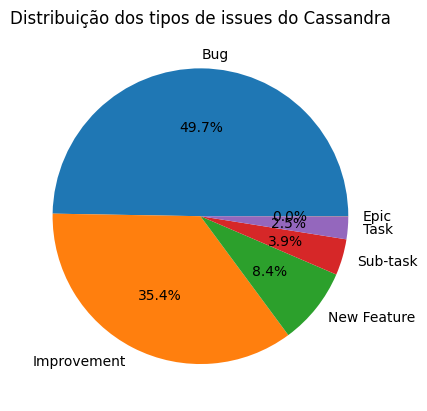

Bug 1448
Improvement 1031
New Feature 245
Sub-task 115
Task 72
Epic 1


In [19]:
show_pie(my_df=df_cassandra_issues_commits_critical_classes, my_field='issue_type', my_title='Distribuição dos tipos de issues do Cassandra')

### ActiveMQ

In [20]:
df_activemq_issues_commits_critical_classes

,issue_key,issue_type,status,summary,created_date,resolved_date,time_resolution
0,AMQ-2199,Bug,Resolved,NullPointerException during broker start on br...,2009-04-08,2009-04-09,1 days
1,AMQ-2198,Improvement,Resolved,Allow suppression of duplicate queue subscript...,2009-04-07,2009-04-07,0 days
2,AMQ-2183,Bug,Resolved,Master/slave out of sync with multiple consume...,2009-03-25,2010-04-27,398 days
3,AMQ-2180,Improvement,Resolved,infinite networkTTL,2009-03-24,2010-06-16,449 days
4,AMQ-2149,Bug,Resolved,Shared Filesystem Master Slave: missing messages,2009-03-06,2009-05-23,78 days
...,...,...,...,...,...,...,...
475,AMQ-9153,Bug,Resolved,Fix Slow Consumer Advisory for Queue subscript...,2022-11-01,2022-11-01,0 days
476,AMQ-9262,Bug,Resolved,Composite consumers do not work properly with ...,2023-06-06,2023-06-07,1 days
477,AMQ-9257,Improvement,Resolved,Disabled expire message checking when pauseDis...,2023-05-10,2023-06-19,40 days
478,AMQ-9239,New Feature,Closed,Jakarta JMS package namespace for broker,2023-03-30,2023-08-30,153 days


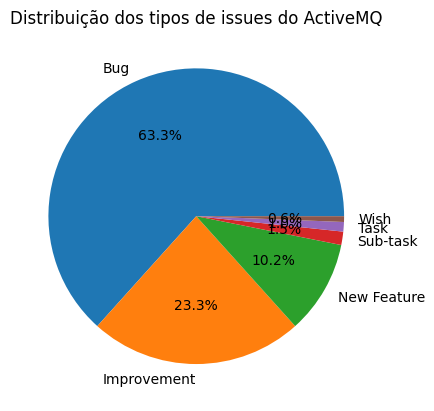

Bug 304
Improvement 112
New Feature 49
Sub-task 7
Task 5
Wish 3


In [21]:
show_pie(my_df=df_activemq_issues_commits_critical_classes, my_field='issue_type', my_title='Distribuição dos tipos de issues do ActiveMQ')

### Kafka

In [22]:
df_kafka_issues_commits_critical_classes

,issue_key,issue_type,status,summary,created_date,resolved_date,time_resolution
0,KAFKA-1286,Sub-task,Resolved,Retry Can Block,2014-03-01,2014-03-05,4 days
1,KAFKA-1261,Sub-task,Resolved,Make metadata refresh configurable,2014-02-12,2014-02-13,1 days
2,KAFKA-1260,Sub-task,Closed,Integration Test for New Producer Part II: Bro...,2014-02-12,2014-02-27,15 days
3,KAFKA-1253,Sub-task,Resolved,Implement compression in new producer,2014-02-10,2014-03-27,45 days
4,KAFKA-1252,Sub-task,Resolved,Implement re-tries in new producer,2014-02-10,2014-02-21,11 days
...,...,...,...,...,...,...,...
934,KAFKA-15485,Improvement,Resolved,Support building with Java 21 (LTS release),2023-09-22,2023-09-25,3 days
935,KAFKA-15429,Bug,Resolved,Kafka Streams attempts to commit on a closed p...,2023-09-02,2023-09-03,1 days
936,KAFKA-15326,Improvement,Resolved,Decouple Processing Thread from Polling Thread,2023-08-09,2023-11-02,85 days
937,KAFKA-15306,Sub-task,Resolved,Integrate committed offsets logic when updatin...,2023-08-04,2023-09-18,45 days


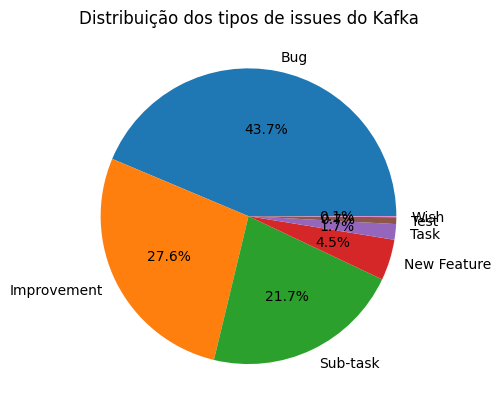

Bug 410
Improvement 259
Sub-task 204
New Feature 42
Task 16
Test 7
Wish 1


In [23]:
show_pie(my_df=df_kafka_issues_commits_critical_classes, my_field='issue_type', my_title='Distribuição dos tipos de issues do Kafka')

### Hadoop

In [24]:
df_hadoop_issues_commits_critical_classes

,issue_key,issue_type,status,summary,created_date,resolved_date,time_resolution
0,HADOOP-6252,Improvement,Closed,Provide method to determine if a deprecated ke...,2009-09-10,2009-09-11,1.0
1,HADOOP-6243,Bug,Closed,NPE in handling deprecated configuration keys.,2009-09-07,2009-09-08,1.0
2,HADOOP-6233,Improvement,Closed,Changes in common to rename the config keys as...,2009-09-02,2009-09-19,17.0
3,HADOOP-6227,Bug,Closed,Configuration does not lock parameters marked ...,2009-09-01,2009-09-01,0.0
4,HADOOP-6184,Bug,Closed,Provide a configuration dump in json format.,2009-08-10,2009-08-24,14.0
...,...,...,...,...,...,...,...
234,HADOOP-18177,Sub-task,Resolved,document use and architecture design of prefet...,2022-03-25,2022-04-26,32.0
235,HADOOP-18175,Sub-task,Resolved,test failures with prefetching s3a input stream,2022-03-25,2022-05-05,41.0
236,HADOOP-18469,Improvement,Resolved,Add XMLUtils methods to centralise code that c...,2022-09-27,2022-10-07,10.0
237,HADOOP-18379,Sub-task,Resolved,rebase feature/HADOOP-18028-s3a-prefetch to trunk,2022-07-28,2022-08-03,6.0


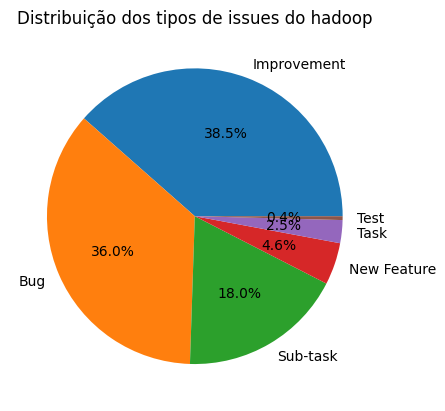

Improvement 92
Bug 86
Sub-task 43
New Feature 11
Task 6
Test 1


In [25]:
show_pie(my_df=df_hadoop_issues_commits_critical_classes, my_field='issue_type', my_title='Distribuição dos tipos de issues do hadoop')

## Resultado das inspeções

### Cassandra

Apenas Issues Inspecionados

In [26]:
df_cassandra_issues_inspected

,issue_key,summary,issue_type,issue_status,issue_priority,description,comments,architectural_impact
0,CASSANDRA-235,Move system CFs into own Table,Sub-task,Resolved,Normal,NaN,"[""commit message for 04 reads\n\n DBManager...",YES
1,CASSANDRA-212,Range queries do not yet span multiple nodes,Bug,Resolved,Normal,Need ability to continue a query on the next n...,"[""All this needs is a bool added to RangeReply...",YES
2,CASSANDRA-173,add getPendingTasks to CFSMBean,Improvement,Resolved,Low,need to add an atomicint and inc/decr it whene...,['rebased patch as 0001-CASSANDRA-173-added-CF...,NO
3,CASSANDRA-124,NullPointerException in consistency manager af...,Bug,Resolved,Urgent,ERROR [CONSISTENCY-MANAGER:2] 2009-04-30 18:22...,"[""Shouldn't ConsistencyManager() constructor c...",NO
4,CASSANDRA-78,Interrupted recovery requires manual intervent...,Bug,Resolved,Urgent,"Originally reported by Alexander Staubo: ""If y...","[""Prashant's memory seems to be wrong here -- ...",NO
...,...,...,...,...,...,...,...,...
221,CASSANDRA-18153,Memtable being flushed without hostId in versi...,Bug,Resolved,Normal,On ticket CASSANDRA-16619 some files were chan...,"['CC [~jlewandowski]\xa0', 'Storage service is...",YES
222,CASSANDRA-18697,Skip ColumnFamilyStore#topPartitions initializ...,Bug,Resolved,Normal,In {{org.apache.cassandra.db.ColumnFamilyStore...,['CI: [https://app.circleci.com/pipelines/gith...,NO
223,CASSANDRA-18681,Internode legacy SSL storage port certificate ...,Bug,Resolved,Normal,In CASSANDRA-16666 the SSLContext cache was ch...,['4.1 [Branch|https://github.com/jonmeredith/c...,YES
224,CASSANDRA-18617,Disable the deprecated keyspace/table threshol...,Improvement,Resolved,Normal,The non-guardrail thresholds 'keyspace_count_w...,"[""Part of this change is to add converters tha...",YES


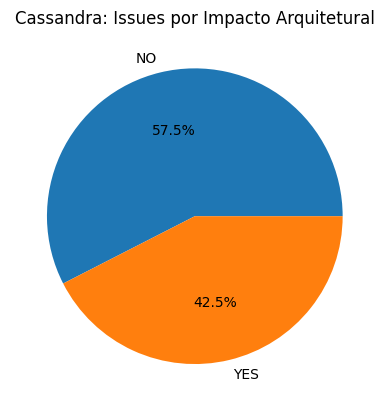

NO 130
YES 96


In [27]:
show_pie(my_df=df_cassandra_issues_inspected, my_field='architectural_impact', my_title='Cassandra: Issues por Impacto Arquitetural')

**Issues com impacto arquitetural (Yes)**

In [28]:
df_cii_yes = df_cassandra_issues_inspected[df_cassandra_issues_inspected.architectural_impact=='YES']
lista_issues_architectural_impact_yes = df_cii_yes.issue_key.to_list()

print('Relação entre Commits e Issues com impacto arquitetural')
df_cassandra_commits_arquivos_criticos = pd.read_excel('cassandra_commits_arquivos_criticos.xlsx')
df_merge_commits_issues_yes_ai = merge_comits_issues(df_cassandra_commits_arquivos_criticos, lista_issues_architectural_impact_yes, 'CASSANDRA')
df_merge_commits_issues_yes_ai

Relação entre Commits e Issues com impacto arquitetural


,hahs,msg,m_files,date,lines,files,diff_files,diff_modified_files,lista_issues
0,9db8da81b7f269e5a8a7f896b751d482847d7082,"Add range query support, which requires using ...","['DatabaseDescriptor.java', 'ColumnFamilyStore...",29/4/2009,1456,19,"[\n {\n ""DatabaseDescriptor.java"": ""...","[\n ""@@ -114,6 +114,9 @@ service Cassandra ...",CASSANDRA-71
1,5cdc75d7603d1051c9d78d6ee11dd9cd44056f44,move Hints cf to SYSTEM_TABLE\npatch by jbelli...,"['DatabaseDescriptor.java', 'ColumnFamilyStore...",24/6/2009,189,7,"[\n {\n ""DatabaseDescriptor.java"": ""...","[\n ""@@ -25,6 +25,8 @@\n <!-- Tables an...",CASSANDRA-235
2,682736ee5ebf33ed344abd1c6e04dc408a07bfe6,r/m recycle cf and undocumented/incomplete Loa...,"['DatabaseDescriptor.java', 'ColumnFamilyStore...",24/6/2009,2165,18,"[\n {\n ""DatabaseDescriptor.java"": ""...","[\n ""@@ -467,12 +467,8 @@ public class Data...",CASSANDRA-235
3,81dd8ee5f6e224c550bdf956e0bec3ec2c92cbee,use normal Table for system metadata\npatch by...,"['DatabaseDescriptor.java', 'StorageService.ja...",24/6/2009,304,8,"[\n {\n ""DatabaseDescriptor.java"": ""...","[\n ""@@ -77,7 +77,6 @@\n Keep the ...",CASSANDRA-235
4,b516ce8176c4ff90f4f1696aba9315941b67f0d0,DBManager obscures rather than clarifies what ...,"['CassandraDaemon.java', 'StorageService.java']",24/6/2009,158,7,"[\n {\n ""CassandraDaemon.java"": ""@@ ...","[\n ""@@ -107,7 +107,7 @@ public class Callo...",CASSANDRA-235
...,...,...,...,...,...,...,...,...,...
106,4f348786bd6d72f4402134a29ddb3355b1fade61,Do not remove truncated_at entry in system.loc...,['ColumnFamilyStore.java'],26/4/2023,128,3,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -1,4 +1,5 @@\n 3.0.29\n+ * Do not r...",CASSANDRA-18105
107,028ea02a4a877d115c748d3e179c6afb2328e430,Remove unrepaired SSTables from garbage collec...,['CompactionManager.java'],4/7/2023,92,3,"[\n {\n ""CompactionManager.java"": ""@...","[\n ""@@ -1,4 +1,5 @@\n 3.11.16\n+ * Remove ...",CASSANDRA-14204
108,aac070681bd01ba796814692c3fba04de103d8b4,Disable the deprecated keyspace/table threshol...,"['Config.java', 'DatabaseDescriptor.java', 'St...",14/7/2023,359,18,"[\n {\n ""Config.java"": ""@@ -826,18 +...","[\n ""@@ -1,4 +1,5 @@\n 5.0\n+ * Disable the...",CASSANDRA-18617
109,cde91e56f09d9ebf315c79c9a81b89f70f4eb724,In-memory index implementation with query path...,"['SinglePartitionReadCommand.java', 'StorageSe...",26/7/2023,20645,244,"[\n {\n ""SinglePartitionReadCommand....","[\n ""@@ -135,5 +135,9 @@\n <groupId>d...",CASSANDRA-18058


In [29]:
print('Dados estatísticos das linhas modificadas e arquivos modificados nos commits')
round(df_merge_commits_issues_yes_ai.describe(), 1)

Dados estatísticos das linhas modificadas e arquivos modificados nos commits


,lines,files
count,111.0,111.0
mean,2724.4,16.0
std,20524.6,34.8
min,1.0,1.0
25%,37.5,3.0
50%,128.0,6.0
75%,416.5,15.0
max,215675.0,244.0


In [30]:
d1_cassandra_issues_ai_yes_lcc = df_merge_commits_issues_yes_ai.lines
d1_cassandra_without_outliers = remove_outliers_from_serie(d1_cassandra_issues_ai_yes_lcc)

d5_cassandra_issues_ai_yes_fcc = df_merge_commits_issues_yes_ai.files
d5_cassandra_without_outliers = remove_outliers_from_serie(d5_cassandra_issues_ai_yes_fcc)

**Calculo do tempo de resolução dos issues com architectural impact**

In [31]:
lista_issues_commits_with_ai = df_cii_yes.issue_key.to_list()
df_issues_commits_with_ai = df_cassandra_issues_commits_critical_classes[df_cassandra_issues_commits_critical_classes['issue_key'].isin(lista_issues_commits_with_ai)]
df_issues_commits_with_ai.time_resolution

7        7 days
13      58 days
59      20 days
68       0 days
108      8 days
         ...   
2868    20 days
2874     5 days
2887    78 days
2896    66 days
2900    23 days
Name: time_resolution, Length: 96, dtype: object

In [32]:
d9_cassandra_issues_ai_yes_tr = convert_list_days_in_list_int(df_issues_commits_with_ai.time_resolution.to_list())
d9_my_series = pd.Series(d9_cassandra_issues_ai_yes_tr)
d9_cassandra_without_outliers = remove_outliers_from_serie(d9_my_series)

**Issues sem impacto arquitetural (No)**

In [33]:
df_cii_no = df_cassandra_issues_inspected[df_cassandra_issues_inspected.architectural_impact=='NO']
lista_issues_architectural_impact_no = df_cii_no.issue_key.to_list()

print('Relação entre Commits e Issues sem impacto arquitetural')
df_merge_commits_issues_no_ai = merge_comits_issues(df_cassandra_commits_arquivos_criticos, lista_issues_architectural_impact_no, 'CASSANDRA')
df_merge_commits_issues_no_ai

Relação entre Commits e Issues sem impacto arquitetural


,hahs,msg,m_files,date,lines,files,diff_files,diff_modified_files,lista_issues
0,bbe89e795bbc631c2b626766840d943498304630,do not leave variables uninitialized in Consis...,['StorageService.java'],4/5/2009,22,2,"[\n {\n ""StorageService.java"": ""@@ -...","[\n ""@@ -145,16 +145,18 @@ class Consistenc...",CASSANDRA-124
1,f70a5a0c8cff203b17285494fbbd99176bbee649,clean up anticompaction code a little.\npatch ...,['ColumnFamilyStore.java'],4/5/2009,43,2,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -1027,8 +1027,6 @@ public class Col...",CASSANDRA-78
2,fce0ee0d7b89576c7f49c2f24a90e8f26e10314a,This changeset abstracts the logic for placing...,['ColumnFamilyStore.java'],5/5/2009,126,3,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -402,11 +402,9 @@ public class Colu...",CASSANDRA-34
3,7779df6ce4633752a0f6768da94627aee2162103,This patch adds ColumnFamilyStore.forceflush t...,['ColumnFamilyStore.java'],5/5/2009,7,2,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -425,7 +425,7 @@ public class Colum...",CASSANDRA-34
4,f17487c541dfae03858ae703015d4049094a0f55,A make hint generation include a real timestam...,['ColumnFamilyStore.java'],5/5/2009,96,3,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -641,7 +641,7 @@ public class Colum...",CASSANDRA-34
...,...,...,...,...,...,...,...,...,...
142,4c85c6a4030d7d613230cd4b2204c42f941fd552,"key_cache_save_period, row_cache_save_period, ...",['Config.java'],19/9/2022,10,3,"[\n {\n ""Config.java"": ""@@ -434,19 +...","[\n ""@@ -1,4 +1,5 @@\n 4.1-alpha2\n+ * We s...",CASSANDRA-17904
143,b8494a82751ae2d31ab0f36412f7eacdcc1c3774,Log warning message on aggregation queries wit...,['SelectStatement.java'],7/2/2023,8,2,"[\n {\n ""SelectStatement.java"": ""@@ ...","[\n ""@@ -1,4 +1,5 @@\n 4.0.8\n+ * Log warni...",CASSANDRA-18219
144,b8e21fb80afa6696374292dc99a480fac9788e64,Validate the existence of a datacenter in node...,['StorageService.java'],17/5/2023,68,3,"[\n {\n ""StorageService.java"": ""@@ -...","[\n ""@@ -1,4 +1,5 @@\n 3.0.30\n+ * Validate...",CASSANDRA-14319
145,9c796dfb272daa3ce57a2dc5cbeadd9273e1ac72,Skip ColumnFamilyStore#topPartitions initializ...,['ColumnFamilyStore.java'],1/8/2023,98,3,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -1,4 +1,5 @@\n 4.1.4\n+ * Skip Colu...",CASSANDRA-18697


In [34]:
print('Dados estatísticos das linhas modificadas e arquivos modificados nos commits')
round(df_merge_commits_issues_no_ai.describe(), 1)

Dados estatísticos das linhas modificadas e arquivos modificados nos commits


,lines,files
count,147.0,147.0
mean,233.6,7.8
std,544.0,12.5
min,1.0,1.0
25%,12.0,2.0
50%,68.0,3.0
75%,192.0,8.0
max,3841.0,93.0


In [35]:
d3_cassandra_issues_ai_no_lcc = df_merge_commits_issues_no_ai.lines
d2_cassandra_without_outliers = remove_outliers_from_serie(d3_cassandra_issues_ai_no_lcc)

d6_cassandra_issues_ai_no_fcc = df_merge_commits_issues_no_ai.files
d6_cassandra_without_outliers = remove_outliers_from_serie(d6_cassandra_issues_ai_no_fcc)

**Calculo do tempo de resolução dos issues sem architectural impact**

In [36]:
df_issues_commits_no_ai = df_cassandra_issues_commits_critical_classes[df_cassandra_issues_commits_critical_classes['issue_key'].isin(lista_issues_architectural_impact_no)]

d10_cassandra_issues_ai_no_tr = convert_list_days_in_list_int(df_issues_commits_no_ai.time_resolution.to_list())
d10_my_series = pd.Series(d10_cassandra_issues_ai_no_tr)
d10_cassandra_without_outliers = remove_outliers_from_serie(d10_my_series)

### ActiveMQ

Apenas Issues Inspecionados

In [37]:
df_activemq_issues_inspected

,issue_key,summary,architectural_impact
0,AMQ-2149,Shared Filesystem Master Slave: missing messages,YES
1,AMQ-2128,close() from MessageListener.onMessage() with ...,NO
2,AMQ-2106,Allow broker to evenly distribute message grou...,YES
3,AMQ-2103,Memory leak when marshaling ActiveMQTextMessag...,NO
4,AMQ-2087,Redelivery after rollback does not seem to wor...,NO
...,...,...,...
127,AMQ-8413,Support different username and password for re...,NO
128,AMQ-9202,Reentrant locks should always be locked outsid...,NO
129,AMQ-9157,Add a new advisory type for dispatched messages,NO
130,AMQ-9153,Fix Slow Consumer Advisory for Queue subscript...,NO


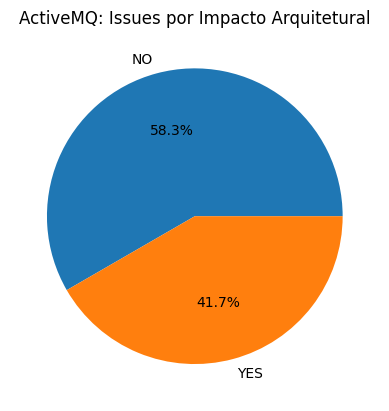

NO 77
YES 55


In [38]:
show_pie(my_df=df_activemq_issues_inspected, my_field='architectural_impact', my_title='ActiveMQ: Issues por Impacto Arquitetural')

In [39]:
df_activemq_issues_commits_critical_classes

,issue_key,issue_type,status,summary,created_date,resolved_date,time_resolution
0,AMQ-2199,Bug,Resolved,NullPointerException during broker start on br...,2009-04-08,2009-04-09,1 days
1,AMQ-2198,Improvement,Resolved,Allow suppression of duplicate queue subscript...,2009-04-07,2009-04-07,0 days
2,AMQ-2183,Bug,Resolved,Master/slave out of sync with multiple consume...,2009-03-25,2010-04-27,398 days
3,AMQ-2180,Improvement,Resolved,infinite networkTTL,2009-03-24,2010-06-16,449 days
4,AMQ-2149,Bug,Resolved,Shared Filesystem Master Slave: missing messages,2009-03-06,2009-05-23,78 days
...,...,...,...,...,...,...,...
475,AMQ-9153,Bug,Resolved,Fix Slow Consumer Advisory for Queue subscript...,2022-11-01,2022-11-01,0 days
476,AMQ-9262,Bug,Resolved,Composite consumers do not work properly with ...,2023-06-06,2023-06-07,1 days
477,AMQ-9257,Improvement,Resolved,Disabled expire message checking when pauseDis...,2023-05-10,2023-06-19,40 days
478,AMQ-9239,New Feature,Closed,Jakarta JMS package namespace for broker,2023-03-30,2023-08-30,153 days


**Issues com Impacto Arquitetural (Yes)**

In [40]:
df_amq_ii_yes = df_activemq_issues_inspected[df_activemq_issues_inspected.architectural_impact=='YES']
lista_amq_issues_architectural_impact_yes = df_amq_ii_yes.issue_key.to_list()
print('Relação entre Commits e Issues com impacto arquitetural')
df_amq_commits_arquivos_criticos = pd.read_excel('activemq_commits_with_critical_classes.xlsx')

df_merge_amq_commits_issues_yes_ai = merge_comits_issues2(df_amq_commits_arquivos_criticos, lista_amq_issues_architectural_impact_yes, 'AMQ')
df_merge_amq_commits_issues_yes_ai

Relação entre Commits e Issues com impacto arquitetural


,hash,msg,date,lines,files,critical_files,modified_files,diff_files,diff_files_modified_files,lista_issues
0,08aecbee6e9754e696f3bdf64634263dc73cb5c5,partial fix for AMQ2149|http://issues.apache.o...,18/3/2009,290,6,['Queue.java'],"['Queue.java', 'AbstractStoreCursor.java', 'Ka...","[{'Queue.java': '@@ -70,6 +70,8 @@ import org....","['@@ -70,6 +70,8 @@ import org.apache.activemq...",AMQ-2149
1,132f662209f7e25a1d9c240fdddcf61e0ed1226c,resolve AMQ-2149|https://issues.apache.org/act...,26/3/2009,326,21,['Queue.java'],"['ActiveMQMessageConsumer.java', 'TransactionC...","[{'Queue.java': '@@ -217,6 +217,10 @@ public c...","['@@ -884,7 +884,7 @@ public class ActiveMQMes...",AMQ-2149
2,e45bb0690764746dc2f6ae66d3b55efa873b4592,"further tests and fixes related to failover, t...",3/4/2009,315,13,"['DurableTopicSubscription.java', 'Queue.java']","['ActiveMQConnection.java', 'ActiveMQMessageCo...","[{'DurableTopicSubscription.java': '@@ -199,7 ...","['@@ -1838,7 +1838,9 @@ public class ActiveMQC...",AMQ-2149
3,89eecadd9da3934609e888f2b781e2602b8a9f9b,resolve https://issues.apache.org/activemq/bro...,30/10/2009,104,2,['Queue.java'],"['Queue.java', 'QueuePurgeTest.java']","[{'Queue.java': '@@ -863,8 +863,8 @@ public cl...","['@@ -863,8 +863,8 @@ public class Queue exten...",AMQ-2468
4,83128fc45b65aff89ba78596a158a01960029742,https://issues.apache.org/activemq/browse/AMQ-...,28/1/2010,236,3,['Queue.java'],"['Queue.java', 'SystemUsage.java', 'JmsTimeout...","[{'Queue.java': '@@ -27,15 +27,19 @@ import ja...","['@@ -27,15 +27,19 @@ import java.util.Iterato...",AMQ-2507
5,a0d2282a418470c4256193f2085a0c3c46d2b67e,resolve https://issues.apache.org/activemq/bro...,15/4/2010,340,6,['Queue.java'],"['BaseDestination.java', 'Queue.java', 'Topic....","[{'Queue.java': '@@ -556,16 +556,16 @@ public ...","['@@ -18,6 +18,8 @@ package org.apache.activem...",AMQ-2668
6,4e8143711a8b4640485bb78f94c52b4f4b8bfa4f,https://issues.apache.org/activemq/browse/AMQ-...,7/5/2010,17,2,['DemandForwardingBridgeSupport.java'],"['DemandForwardingBridgeSupport.java', 'Duplex...",[{'DemandForwardingBridgeSupport.java': '@@ -4...,"['@@ -473,7 +473,8 @@ public abstract class De...",AMQ-2706
7,9c47f6b38548d089fe05a63ed37d9ca81fc91376,https://issues.apache.org/activemq/browse/AMQ-...,9/6/2010,117,2,['DurableTopicSubscription.java'],"['DurableTopicSubscription.java', 'DurableSubs...","[{'DurableTopicSubscription.java': '@@ -72,6 +...","['@@ -72,6 +72,10 @@ public class DurableTopic...",AMQ-2665
8,bb17d6151665c040e5960598403168f7bf5669ec,https://issues.apache.org/activemq/browse/AMQ-...,10/6/2010,4,1,['DurableTopicSubscription.java'],['DurableTopicSubscription.java'],"[{'DurableTopicSubscription.java': '@@ -72,11 ...","['@@ -72,11 +72,11 @@ public class DurableTopi...",AMQ-2665
9,11705e70b4395c25f275ae448efc12b0fec8d501,https://issues.apache.org/activemq/browse/AMQ-...,20/7/2010,254,16,['BrokerService.java'],"['BrokerContext.java', 'BrokerContextAware.jav...","[{'BrokerService.java': '@@ -34,10 +34,12 @@ i...","['@@ -0,0 +1,32 @@\n+/**\n+ * Licensed to the ...",AMQ-2702


In [41]:
print('Dados estatísticos das linhas modificadas e arquivos modificados nos commits')
round(df_merge_amq_commits_issues_yes_ai.describe(), 1)

Dados estatísticos das linhas modificadas e arquivos modificados nos commits


,lines,files
count,57.0,57.0
mean,329.6,16.6
std,657.8,74.8
min,4.0,1.0
25%,46.0,2.0
50%,181.0,4.0
75%,327.0,12.0
max,4738.0,570.0


In [42]:
d2_activemq_issues_ai_yes_lcc = df_merge_amq_commits_issues_yes_ai.lines
d3_activemq_without_outliers = remove_outliers_from_serie(d2_activemq_issues_ai_yes_lcc)

d7_activemq_issues_ai_yes_fcc = df_merge_amq_commits_issues_yes_ai.files
d7_activemq_without_outliers = remove_outliers_from_serie(d7_activemq_issues_ai_yes_fcc)

**Calcula o tempo de resolução da issue com impacto architetural**

In [43]:
df11_issues_commits_with_ai = df_activemq_issues_commits_critical_classes[df_activemq_issues_commits_critical_classes['issue_key'].isin(lista_amq_issues_architectural_impact_yes)]
s11 = df11_issues_commits_with_ai.time_resolution.dropna()

d11_activemq_issues_ai_yes_tr = convert_list_days_in_list_int(s11.to_list())
d11_my_series = pd.Series(d11_activemq_issues_ai_yes_tr)
d11_activema_without_outliers = remove_outliers_from_serie(d11_my_series)

**Issues sem impacto arquitetural (No)**

In [44]:
df_amq_ii_no = df_activemq_issues_inspected[df_activemq_issues_inspected.architectural_impact=='NO']
lista_amq_issues_architectural_impact_no = df_amq_ii_no.issue_key.to_list()
print('Relação entre Commits e Issues sem impacto arquitetural')

df_merge_amq_commits_issues_no = merge_comits_issues2(df_amq_commits_arquivos_criticos, lista_amq_issues_architectural_impact_no, 'AMQ')
df_merge_amq_commits_issues_no

Relação entre Commits e Issues sem impacto arquitetural


,hash,msg,date,lines,files,critical_files,modified_files,diff_files,diff_files_modified_files,lista_issues
0,07b6a38336a62913d42817a89cdc821a89419b7f,AMQ-2053 introduce methods to remove (closed) ...,7/1/2009,164,12,['Queue.java'],"['AbstractRegion.java', 'DestinationFactory.ja...","[{'Queue.java': '@@ -850,9 +850,9 @@ public cl...","['@@ -203,7 +203,7 @@ public abstract class Ab...",AMQ-2053
1,3b08860f10a12b8753e24756cf66f4a8d66b270e,resolve https://issues.apache.org/activemq/bro...,29/1/2009,12202,129,['Queue.java'],"['pom.xml', 'ActiveMQConnection.java', 'Active...","[{'Queue.java': '@@ -280,7 +280,7 @@ public cl...","['@@ -659,7 +659,7 @@\n <tas...",AMQ-2087
2,184761a119ae684a910bed41bc0f81bc2334fdb4,"tidy up redispatch logic a little more, resolv...",19/2/2009,149,3,['Queue.java'],"['ActiveMQMessageConsumer.java', 'Queue.java',...","[{'Queue.java': '@@ -336,8 +336,7 @@ public cl...","['@@ -630,7 +630,7 @@ public class ActiveMQMes...",AMQ-2128
3,62e1abfb902ac48741481bd0d80783ecef9e79a4,fix for https://issues.apache.org/activemq/bro...,11/5/2009,122,7,['BrokerService.java'],"['BrokerService.java', 'ManagementContext.java...","[{'BrokerService.java': '@@ -31,12 +31,13 @@ i...","['@@ -31,12 +31,13 @@ import java.util.concurr...",AMQ-2245
4,dbe847e0dade437ba678299f62e899f61b95a3e9,resolve https://issues.apache.org/activemq/bro...,9/7/2009,137,3,['Queue.java'],"['Queue.java', 'ExpiredMessagesTest.java', 'Ex...","[{'Queue.java': '@@ -205,7 +205,9 @@ public cl...","['@@ -205,7 +205,9 @@ public class Queue exten...",AMQ-2322
...,...,...,...,...,...,...,...,...,...,...
78,596ee316874894ad0342475d8f242913bd507cd1,AMQ-9153: Fix slow consumer advisory for queue...,1/11/2022,53,2,['Queue.java'],"['Queue.java', 'AdvisoryTests.java']","[{'Queue.java': '@@ -2210,6 +2210,16 @@ public...","['@@ -2210,6 +2210,16 @@ public class Queue ex...",AMQ-9153
79,76f612600d291dfb4152b90a3dbfc9ce8ea2e1a5,AMQ-9157 - Add a new optional advisory for dis...,3/11/2022,273,15,['TopicSubscription.java'],"['AdvisoryBroker.java', 'Broker.java', 'Broker...","[{'TopicSubscription.java': '@@ -701,6 +701,7 ...","['@@ -488,6 +488,27 @@ public class AdvisoryBr...",AMQ-9157
80,c140d73feca4a18044701ebf1df2859ec8c33207,AMQ-9157 - Include consumer id as part of Disp...,11/11/2022,44,12,['TopicSubscription.java'],"['AdvisoryBroker.java', 'Broker.java', 'Broker...","[{'TopicSubscription.java': '@@ -702,7 +702,7 ...","['@@ -489,8 +489,8 @@ public class AdvisoryBro...",AMQ-9157
81,ed924cddac90b96bdc47b215852a68155d818bcd,AMQ-9202 - Make sure Reentrant locks are acqui...,1/2/2023,86,3,['Queue.java'],"['Queue.java', 'MessageDatabase.java', 'Abstra...","[{'Queue.java': '@@ -1299,8 +1299,8 @@ public ...","['@@ -1299,8 +1299,8 @@ public class Queue ext...",AMQ-9202


In [45]:
print('Dados estatísticos das linhas modificadas e arquivos modificados nos commits')
round(df_merge_amq_commits_issues_no.describe(), 1)

Dados estatísticos das linhas modificadas e arquivos modificados nos commits


,lines,files
count,83.0,83.0
mean,295.9,6.6
std,1334.6,14.9
min,1.0,1.0
25%,27.5,2.0
50%,92.0,3.0
75%,223.0,7.0
max,12202.0,129.0


In [46]:
d4_activemq_issues_ai_no_lcc = df_merge_amq_commits_issues_no.lines
d4_activemq_without_outliers = remove_outliers_from_serie(d4_activemq_issues_ai_no_lcc)

d8_activemp_issues_ai_no_fcc = df_merge_amq_commits_issues_no.files
d8_activemq_without_outliers = remove_outliers_from_serie(d8_activemp_issues_ai_no_fcc)

**Calcula tempo de resolução dos issues sem impacto arquitetural**

In [47]:
df12_issues_commits_no_ai = df_activemq_issues_commits_critical_classes[df_activemq_issues_commits_critical_classes['issue_key'].isin(lista_amq_issues_architectural_impact_no)]
s12 = df12_issues_commits_no_ai.time_resolution.dropna()

d12_activemq_issues_ai_no_tr = convert_list_days_in_list_int(s12.to_list())
d12_my_series = pd.Series(d12_activemq_issues_ai_no_tr)
d12_activemq_without_outliers = remove_outliers_from_serie(d12_my_series)

### Kafka

Apenas Issues Inspecionados

In [48]:
df_kafka_issues_inspected

,issue_key,issue_type,status,summary,created_date,resolved_date,time_resolution,architectural_impact
0,KAFKA-1253,Sub-task,Resolved,Implement compression in new producer,2014-02-10,2014-03-27,45 days,YES
1,KAFKA-1250,Sub-task,Resolved,Add slf4j logging to new producer,2014-02-10,2014-02-28,18 days,NO
2,KAFKA-1498,Bug,Resolved,new producer performance and bug improvements,2014-06-19,2014-09-02,75 days,NO
3,KAFKA-2313,Bug,Resolved,javadoc fix for KafkaConsumer deserialization,2015-07-07,2015-07-07,0 days,NO
4,KAFKA-2123,Sub-task,Resolved,Make new consumer offset commit API use callba...,2015-04-14,2015-07-15,92 days,YES
...,...,...,...,...,...,...,...,...
174,KAFKA-14853,Bug,Resolved,the serializer/deserialize which extends Clust...,2023-03-27,2023-03-29,2 days,NO
175,KAFKA-14834,Improvement,Resolved,Improved processor semantics for versioned stores,2023-03-22,2023-04-14,23 days,YES
176,KAFKA-14771,Improvement,Resolved,Include current thread ids in ConcurrentModifi...,2023-03-01,2023-04-03,33 days,NO
177,KAFKA-14675,Sub-task,Resolved,Extract metadata-related tasks from Fetcher in...,2023-02-03,2023-02-21,18 days,YES


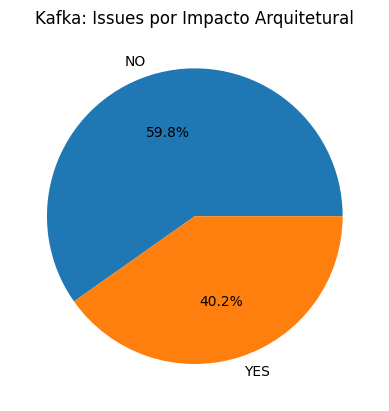

NO 107
YES 72


In [49]:
show_pie(my_df=df_kafka_issues_inspected, my_field='architectural_impact', my_title='Kafka: Issues por Impacto Arquitetural')

**Issues com Impacto Arquitetural (Yes)**

In [50]:
df_kfk_ai_yes = df_kafka_issues_inspected[df_kafka_issues_inspected.architectural_impact=='YES']
lista_kfk_issues_architectural_impact_yes = df_kfk_ai_yes.issue_key.to_list()
print('Relação entre Commits e Issues com impacto arquitetural')
df_kfk_commits_arquivos_criticos = pd.read_excel('kafka_commits_with_critical_classes.xlsx')

df_merge_kfk_commits_issues_yes_ai = merge_comits_issues2(df_kfk_commits_arquivos_criticos, lista_kfk_issues_architectural_impact_yes, 'KAFKA')
df_merge_kfk_commits_issues_yes_ai

Relação entre Commits e Issues com impacto arquitetural


,hash,msg,date,lines,files,critical_files,modified_files,diff_files,diff_files_modified_files,lista_issues
0,466a83b78c2bfcb9ac3116748394e7845a99bf7a,KAFKA-1253 Compression in the new producer; re...,26/3/2014,545,19,['KafkaProducer.java'],"['build.gradle', 'KafkaProducer.java', 'Produc...","[{'KafkaProducer.java': '@@ -69,6 +69,7 @@ pub...","['@@ -151,7 +151,6 @@ project(\':core\') {\n ...",KAFKA-1253
1,99c0686be2141a0fffe1c55e279370a87ef8c1ea,KAFKA-2123: add callback in commit api and use...,15/7/2015,3334,33,"['KafkaConsumer.java', 'Fetcher.java']","['Consumer.java', 'ConsumerCommitCallback.java...","[{'KafkaConsumer.java': '@@ -15,9 +15,10 @@ pa...","['@@ -63,11 +63,21 @@ public interface Consume...",KAFKA-2123
2,421de0a3f93f8d21f7ca0f1287a4305c00edaa08,KAFKA-2727: Topology partial construction\n\ng...,4/11/2015,256,9,['StreamThread.java'],"['TopologyBuilder.java', 'StreamThread.java', ...","[{'StreamThread.java': '@@ -418,7 +418,9 @@ pu...","['@@ -63,18 +63,23 @@ public class TopologyBui...",KAFKA-2727
3,5aad4999d1a1d35d61365ff57a9b79a6af3e70d2,KAFKA-3016: phase-2. stream join implementatio...,6/1/2016,2074,16,['KStreamImpl.java'],"['JoinWindowSpec.java', 'KStream.java', 'Slidi...","[{'KStreamImpl.java': '@@ -19,6 +19,7 @@ packa...","['@@ -0,0 +1,91 @@\n+/**\n+ * Licensed to the ...",KAFKA-3016
4,8a863ecee7e5dcdaf66a55b91040a7893ffdbf66,KAFKA-3117: handle metadata updates during con...,20/4/2016,146,6,['ConsumerCoordinator.java'],"['Metadata.java', 'AbstractCoordinator.java', ...","[{'ConsumerCoordinator.java': '@@ -63,7 +63,6 ...","['@@ -107,6 +107,14 @@ public final class Meta...",KAFKA-3117
...,...,...,...,...,...,...,...,...,...,...
83,e9fe2a2eeaf449cddd7770a1a7fa07bc75918c69,KAFKA-14936: Check the versioned table's histo...,20/7/2023,101,4,['KStreamImpl.java'],"['KStreamImpl.java', 'StreamTableJoinNode.java...","[{'KStreamImpl.java': '@@ -1232,7 +1232,7 @@ p...","['@@ -1232,7 +1232,7 @@ public class KStreamIm...",KAFKA-14936
84,d0b7677c2c9a8265643a90175f86987521615849,KAFKA-14936: Add restore logic (3/N) (#14027)...,18/8/2023,464,6,['KStreamImpl.java'],"['KStreamImpl.java', 'RocksDBTimeOrderedKeyVal...","[{'KStreamImpl.java': '@@ -1271,7 +1271,7 @@ p...","['@@ -1271,7 +1271,7 @@ public class KStreamIm...",KAFKA-14936
85,ad76497b12b0d81a98dc6e230e5516adffbfa0ee,KAFKA-14936: fix grace period partition issue ...,21/8/2023,227,7,['KStreamImpl.java'],"['KStreamImpl.java', 'KStreamKTableJoin.java',...","[{'KStreamImpl.java': '@@ -76,9 +76,6 @@ impor...","['@@ -76,9 +76,6 @@ import java.util.Optional;...",KAFKA-14936
86,d293cd0735e050325eb7d2eafec435ec8aec92eb,KAFKA-15429: catch+log errors from unsubscribe...,2/9/2023,8,1,['StreamThread.java'],['StreamThread.java'],"[{'StreamThread.java': '@@ -1196,8 +1196,12 @@...","['@@ -1196,8 +1196,12 @@ public class StreamTh...",KAFKA-15429


In [51]:
print('Dados estatísticos das linhas modificadas e arquivos modificados nos commits')
round(df_merge_kfk_commits_issues_yes_ai.describe(), 1)

Dados estatísticos das linhas modificadas e arquivos modificados nos commits


,lines,files
count,88.0,88.0
mean,861.8,18.5
std,1243.2,23.1
min,8.0,1.0
25%,210.0,5.0
50%,391.0,10.5
75%,702.5,20.0
max,5672.0,120.0


In [52]:
d2_kafka_issues_ai_yes_lcc = df_merge_kfk_commits_issues_yes_ai.lines
d3_kafka_without_outliers = remove_outliers_from_serie(d2_kafka_issues_ai_yes_lcc)

d7_kafka_issues_ai_yes_fcc = df_merge_kfk_commits_issues_yes_ai.files
d7_kafka_without_outliers = remove_outliers_from_serie(d7_kafka_issues_ai_yes_fcc)

**Calcula o tempo de resolução da issue com impacto architetural**


In [53]:
df11_kafka_issues_commits_with_ai = df_kafka_issues_commits_critical_classes[df_kafka_issues_commits_critical_classes['issue_key'].isin(lista_kfk_issues_architectural_impact_yes)]
s11_kafka = df11_kafka_issues_commits_with_ai.time_resolution.dropna()

d11_kafka_issues_ai_yes_tr = convert_list_days_in_list_int(s11_kafka.to_list())
d11_kafka_my_series = pd.Series(d11_kafka_issues_ai_yes_tr)
d11_kafka_without_outliers = remove_outliers_from_serie(d11_kafka_my_series)

**Issues sem impacto arquitetural (No)**

In [54]:
df_kfk_ai_no = df_kafka_issues_inspected[df_kafka_issues_inspected.architectural_impact=='NO']
lista_kfk_issues_architectural_impact_no = df_kfk_ai_no.issue_key.to_list()
print('Relação entre Commits e Issues sem impacto arquitetural')

df_merge_kfk_commits_issues_no = merge_comits_issues2(df_kfk_commits_arquivos_criticos, lista_kfk_issues_architectural_impact_no, 'KAFKA')
df_merge_kfk_commits_issues_no

Relação entre Commits e Issues sem impacto arquitetural


,hash,msg,date,lines,files,critical_files,modified_files,diff_files,diff_files_modified_files,lista_issues
0,f1a53b972eb1f8e75db54d3272d9eb7c398e238a,KAFKA-1250 Add logging to new producer.,27/2/2014,464,18,['KafkaProducer.java'],"['build.gradle', 'KafkaProducer.java', 'Produc...","[{'KafkaProducer.java': '@@ -45,6 +45,8 @@ imp...","['@@ -310,6 +310,7 @@ project(\':clients\') {\...",KAFKA-1250
1,f1c6e97d718581566d037a48640ac3d869d1f15a,KAFKA-1498 Misc. producer performance enhancem...,1/7/2014,307,13,['KafkaProducer.java'],"['NetworkClient.java', 'KafkaProducer.java', '...","[{'KafkaProducer.java': '@@ -22,7 +22,6 @@ imp...","['@@ -116,7 +116,7 @@ public class NetworkClie...",KAFKA-1498
2,f13dd8024d5bc1c11587a3b539556ea01e2c84ca,KAFKA-2313: javadoc fix for KafkaConsumer dese...,7/7/2015,12,1,['KafkaConsumer.java'],['KafkaConsumer.java'],"[{'KafkaConsumer.java': ""@@ -131,8 +131,8 @@ i...","[""@@ -131,8 +131,8 @@ import static org.apache...",KAFKA-2313
3,006b45c7e5b94e70b3a4200f4646042f3557c48e,KAFKA-2400: Expose heartbeat interval in Kafka...,6/8/2015,54,8,['KafkaConsumer.java'],"['ConsumerConfig.java', 'KafkaConsumer.java', ...","[{'KafkaConsumer.java': '@@ -540,6 +540,7 @@ p...","['@@ -50,6 +50,12 @@ public class ConsumerConf...",KAFKA-2400
4,04b0d870b263117e301584bfc00dd8e81486617a,KAFKA-2429: Add annotations to mark classes as...,12/8/2015,52,3,['KafkaConsumer.java'],"['Consumer.java', 'KafkaConsumer.java', 'Inter...","[{'KafkaConsumer.java': '@@ -26,6 +26,7 @@ imp...","['@@ -21,11 +21,13 @@ import org.apache.kafka....",KAFKA-2429
...,...,...,...,...,...,...,...,...,...,...
116,0fc029c6a47a7a930a2b078569de1173cdb547a4,KAFKA-14299: Fix pause and resume with state u...,21/2/2023,255,12,"['KafkaStreams.java', 'StreamThread.java']","['KafkaStreams.java', 'DefaultStateUpdater.jav...","[{'KafkaStreams.java': '@@ -1751,6 +1751,7 @@ ...","['@@ -1751,6 +1751,7 @@ public class KafkaStre...",KAFKA-14299
117,6e8d0d9850b05fc1de0ceaf77834e68939f782c1,KAFKA-14853 the serializer/deserialize which e...,29/3/2023,55,3,"['KafkaConsumer.java', 'KafkaProducer.java']","['KafkaConsumer.java', 'KafkaProducer.java', '...","[{'KafkaConsumer.java': '@@ -727,8 +727,8 @@ p...","['@@ -727,8 +727,8 @@ public class KafkaConsum...",KAFKA-14853
118,4e1fcf18475d44721d90de00c7ce8b345394d956,KAFKA-14771: Include threads info in Concurren...,3/4/2023,8,1,['KafkaConsumer.java'],['KafkaConsumer.java'],"[{'KafkaConsumer.java': '@@ -2543,9 +2543,13 @...","['@@ -2543,9 +2543,13 @@ public class KafkaCon...",KAFKA-14771
119,ef453dd1ad4d6388bd7a74dcb0c2d2573ee945a6,KAFKA-12634 enforce checkpoint after restorati...,7/4/2023,85,2,['StreamTask.java'],"['StreamTask.java', 'StreamTaskTest.java']","[{'StreamTask.java': '@@ -270,6 +270,9 @@ publ...","['@@ -270,6 +270,9 @@ public class StreamTask ...",KAFKA-12634


In [55]:
print('Dados estatísticos das linhas modificadas e arquivos modificados nos commits')
round(df_merge_kfk_commits_issues_no.describe(), 1)


Dados estatísticos das linhas modificadas e arquivos modificados nos commits


,lines,files
count,121.0,121.0
mean,478.7,12.3
std,1074.8,17.1
min,4.0,1.0
25%,85.0,4.0
50%,221.0,7.0
75%,457.0,13.0
max,10684.0,143.0


In [56]:
d4_kafka_issues_ai_no_lcc = df_merge_kfk_commits_issues_no.lines
d4_kafka_without_outliers = remove_outliers_from_serie(d4_kafka_issues_ai_no_lcc)

d8_kafka_issues_ai_no_fcc = df_merge_kfk_commits_issues_no.files
d8_kafka_without_outliers = remove_outliers_from_serie(d8_kafka_issues_ai_no_fcc)

**Calcula tempo de resolução dos issues sem impacto arquitetural**

In [57]:
df12_kafka_issues_commits_no_ai = df_kafka_issues_commits_critical_classes[df_kafka_issues_commits_critical_classes['issue_key'].isin(lista_kfk_issues_architectural_impact_no)]
s12_kafka = df12_kafka_issues_commits_no_ai.time_resolution.dropna()

d12_kafka_issues_ai_no_tr = convert_list_days_in_list_int(s12_kafka.to_list())
d12_kafka_my_series = pd.Series(d12_kafka_issues_ai_no_tr)
d12_kafka_without_outliers = remove_outliers_from_serie(d12_kafka_my_series)

### Hadoop

In [58]:
df_hadoop_issues_inspected

,issue_key,issue_type,status,summary,created_date,resolved_date,time_resolution,architectural_impact
0,HADOOP-6252,Improvement,Closed,Provide method to determine if a deprecated ke...,2009-09-10,2009-09-11,1.0,NO
1,HADOOP-6184,Bug,Closed,Provide a configuration dump in json format.,2009-08-10,2009-08-24,14.0,YES
2,HADOOP-6165,New Feature,Closed,Add metadata to Serializations,2009-07-22,2009-09-03,43.0,YES
3,HADOOP-6161,Improvement,Closed,Add get/setEnum to Configuration,2009-07-18,2009-07-20,2.0,NO
4,HADOOP-6103,Bug,Closed,Configuration clone constructor does not clone...,2009-06-24,2009-08-21,58.0,NO
...,...,...,...,...,...,...,...,...
143,HADOOP-18266,Sub-task,Resolved,Replace with HashSet/TreeSet constructor in Ha...,2022-05-27,2022-06-20,24.0,NO
144,HADOOP-18229,Sub-task,Resolved,Fix Hadoop Common Java Doc Errors,2022-05-09,2022-05-18,9.0,NO
145,HADOOP-18190,Sub-task,Resolved,Collect IOStatistics during S3A prefetching,2022-03-29,2022-07-26,119.0,YES
146,HADOOP-18180,Sub-task,Resolved,Remove use of scala jar twitter util-core with...,2022-03-28,2022-04-04,7.0,NO


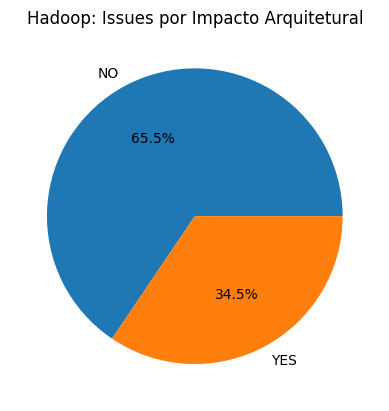

NO 97
YES 51


In [59]:
show_pie(my_df=df_hadoop_issues_inspected, my_field='architectural_impact', my_title='Hadoop: Issues por Impacto Arquitetural')

**Issues com Impacto Arquitetural (Yes)**

In [60]:
df_hdp_ai_yes = df_hadoop_issues_inspected[df_hadoop_issues_inspected.architectural_impact=='YES']
lista_hdp_issues_architectural_impact_yes = df_hdp_ai_yes.issue_key.to_list()
print('Relação entre Commits e Issues com impacto arquitetural')
df_hdp_commits_arquivos_criticos = pd.read_excel('hadoop_commits_with_critical_classes.xlsx')

df_merge_hdp_commits_issues_yes_ai = merge_comits_issues2(df_hdp_commits_arquivos_criticos, lista_hdp_issues_architectural_impact_yes, 'HADOOP')
df_merge_hdp_commits_issues_yes_ai


Relação entre Commits e Issues com impacto arquitetural


,hash,msg,date,lines,files,critical_files,modified_files,diff_files,diff_files_modified_files,lista_issues
0,280ab0cf7d71882cd3af8cf4e77a1af96844e0c6,HADOOP-6184. Provide an API to dump Configurat...,24/8/2009,264,3,['Configuration.java'],"['CHANGES.txt', 'Configuration.java', 'TestCon...","[{'Configuration.java': '@@ -28,6 +28,7 @@\n i...","['@@ -504,6 +504,9 @@ Trunk (unreleased change...",HADOOP-6184
1,b5c31f4ee65addc5e43b5601b5579ebd17f03475,HADOOP-6313. Implement Syncable interface in F...,30/10/2009,90,5,['FSDataOutputStream.java'],"['CHANGES.txt', 'FSDataOutputStream.java', 'Ra...","[{'FSDataOutputStream.java': '@@ -91,10 +91,29...","['@@ -246,6 +246,9 @@ Release 0.21.0 - Unrelea...",HADOOP-6313
2,09ec9c4ffcb2f6c88a5303e88e7ae42a179eca2a,HADOOP-6269. Fix threading issue with defaultR...,21/11/2009,10,2,['Configuration.java'],"['CHANGES.txt', 'Configuration.java']","[{'Configuration.java': '@@ -44,6 +44,7 @@\n i...","['@@ -1181,6 +1181,9 @@ Release 0.20.2 - Unrel...",HADOOP-6269
3,0485fe23ba76f7d96a198aed00f392fd571124bc,HADOOP-6471. StringBuffer -> StringBuilder - c...,22/3/2010,189,31,"['Configuration.java', 'BytesWritable.java', '...","['CHANGES.txt', 'Anonymizer.java', 'CPUParser....","[{'Configuration.java': '@@ -934,7 +934,7 @@ p...","['@@ -199,6 +199,9 @@ Trunk (unreleased change...",HADOOP-6471
4,67c006c322c3925b42322f6ced841a54084f582a,HADOOP-6521. User specified umask using deprec...,24/4/2010,110,5,['Configuration.java'],"['CHANGES.txt', 'Configuration.java', 'FsPermi...","[{'Configuration.java': '@@ -295,20 +295,6 @@ ...","['@@ -276,6 +276,10 @@ Trunk (unreleased chang...",HADOOP-6521
5,04f1e7a41874bb93434c91c80544eda24afbb215,HADOOP-7001. Configuration changes can occur ...,24/11/2010,840,7,['Configuration.java'],"['CHANGES.txt', 'Configuration.java', 'Reconfi...","[{'Configuration.java': '@@ -587,12 +587,22 @@...","['@@ -14,6 +14,9 @@ Trunk (unreleased changes)...",HADOOP-7001
6,a15d473c464b9ed52f09ff719ec3c53b7473a17d,HADOOP-7046. Fix Findbugs warning in Configura...,24/1/2011,5,3,['Configuration.java'],"['CHANGES.txt', 'Configuration.java', 'test-pa...","[{'Configuration.java': '@@ -1591,7 +1591,6 @@...","['@@ -451,6 +451,8 @@ Release 0.22.0 - Unrelea...",HADOOP-7046
7,a196766ea07775f18ded69bd9e8d239f8cfd3ccc,HADOOP-7106. Reorganize SVN layout to combine ...,12/6/2011,644212,3798,"['Configuration.java', 'FSDataOutputStream.jav...","['.gitignore', 'CHANGES.txt', 'LICENSE.txt', '...","[{'Configuration.java': ''}, {'FSDataOutputStr...","['', '', '', '', '', '', '', '', '', '', '', '...",HADOOP-7106
8,0f6dfeeacbab65a31a33927a4eb84871d371fe52,HADOOP-6671. Use maven for hadoop common build...,2/8/2011,5532,1045,"['Configuration.java', 'FSDataOutputStream.jav...","['.gitignore', 'build.xml', 'configuration.xsl...","[{'Configuration.java': ''}, {'FSDataOutputStr...","['@@ -0,0 +1,7 @@\n+*.iml\n+*.ipr\n+*.iws\n+.i...",HADOOP-6671
9,7d8e9d696049f4a7d6bdf1e78965e14a5c65263f,HADOOP-7524 Change RPC to allow multiple proto...,21/9/2011,19,3,['DataNode.java'],"['CHANGES.txt', 'DataNode.java', 'NameNodeRpcS...","[{'DataNode.java': '@@ -425,7 +425,7 @@ void r...","['@@ -38,6 +38,8 @@ Trunk (unreleased changes)...",HADOOP-7524


In [61]:
df_merge_hdp_commits_issues_yes_ai.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 0 to 45
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   hash                       46 non-null     object
 1   msg                        46 non-null     object
 2   date                       46 non-null     object
 3   lines                      46 non-null     int64 
 4   files                      46 non-null     int64 
 5   critical_files             46 non-null     object
 6   modified_files             46 non-null     object
 7   diff_files                 46 non-null     object
 8   diff_files_modified_files  46 non-null     object
 9   lista_issues               46 non-null     object
dtypes: int64(2), object(8)
memory usage: 4.0+ KB


In [62]:
round(df_merge_hdp_commits_issues_yes_ai.describe(), 2)

,lines,files
count,46.00,46.00
mean,22513.33,210.61
std,106912.63,700.68
min,2.00,1.00
25%,91.25,3.00
50%,194.50,5.00
75%,700.50,25.75
max,644212.00,3798.00


In [63]:
# cria as variáveis para os boxplot

d2_hadoop_issues_ai_yes_lcc = df_merge_hdp_commits_issues_yes_ai.lines
d3_hadoop_without_outliers = remove_outliers_from_serie(d2_hadoop_issues_ai_yes_lcc)

d7_hadoop_issues_ai_yes_fcc = df_merge_hdp_commits_issues_yes_ai.files
d7_hadoop_without_outliers = remove_outliers_from_serie(d7_hadoop_issues_ai_yes_fcc)

**Calcula o tempo de resolução dos issues**

In [64]:
df11_hadoop_issues_commits_with_ai = df_hadoop_issues_commits_critical_classes[df_hadoop_issues_commits_critical_classes['issue_key'].isin(lista_hdp_issues_architectural_impact_yes)]

In [65]:
s11_hadoop = df11_hadoop_issues_commits_with_ai.time_resolution.dropna()

In [66]:
d11_hadoop_issues_ai_yes_tr = convert_list_days_in_list_int2(s11_hadoop.to_list())
d11_hadoop_my_series = pd.Series(d11_hadoop_issues_ai_yes_tr)
d11_hadoop_without_outliers = remove_outliers_from_serie(d11_hadoop_my_series)

**Issues sem impacto arquitetural (No)**


In [67]:
df_hdp_ai_no = df_hadoop_issues_inspected[df_hadoop_issues_inspected.architectural_impact=='NO']
lista_hdp_issues_architectural_impact_no = df_hdp_ai_no.issue_key.to_list()
print('Relação entre Commits e Issues sem impacto arquitetural')

df_merge_hdp_commits_issues_no = merge_comits_issues2(df_hdp_commits_arquivos_criticos, lista_hdp_issues_architectural_impact_no, 'HADOOP')
df_merge_hdp_commits_issues_no

Relação entre Commits e Issues sem impacto arquitetural


,hash,msg,date,lines,files,critical_files,modified_files,diff_files,diff_files_modified_files,lista_issues
0,3200b2ec588dfa5c50f1ec6192ff93ab9187f82d,HADOOP-6161. Add get/setEnum methods to Config...,20/7/2009,43,3,['Configuration.java'],"['CHANGES.txt', 'Configuration.java', 'TestCon...","[{'Configuration.java': '@@ -595,6 +595,30 @@ ...","['@@ -480,6 +480,8 @@ Trunk (unreleased change...",HADOOP-6161
1,0a8e65c23b1a8380b4246f18755ebb5d3f376111,HADOOP-6103. Clones the classloader as part of...,21/8/2009,25,3,['Configuration.java'],"['CHANGES.txt', 'Configuration.java', 'TestCon...","[{'Configuration.java': '@@ -243,6 +243,9 @@ p...","['@@ -928,6 +928,9 @@ Trunk (unreleased change...",HADOOP-6103
2,ae6721a85a233e10af18d8d87983afb0f518277a,HADOOP-6252. Provide a method to determine if ...,11/9/2009,43,3,['Configuration.java'],"['CHANGES.txt', 'Configuration.java', 'TestCon...","[{'Configuration.java': '@@ -44,7 +44,6 @@\n i...","['@@ -547,6 +547,9 @@ Trunk (unreleased change...",HADOOP-6252
3,1ecee2e06287a7dbc93da7e6b37431b0fe053e7f,HADOOP-6312. Remove unnecessary debug logging ...,17/10/2009,11,2,['Configuration.java'],"['CHANGES.txt', 'Configuration.java']","[{'Configuration.java': '@@ -383,9 +383,6 @@ p...","['@@ -27,6 +27,9 @@ Trunk (unreleased changes)...",HADOOP-6312
4,a473f3773342695cdb47e3ae4fe432b81e7787fd,HADOOP-6346. Add support for specifying unpack...,9/12/2009,279,5,['Configuration.java'],"['CHANGES.txt', 'Configuration.java', 'RunJar....","[{'Configuration.java': '@@ -47,6 +47,7 @@\n i...","['@@ -43,6 +43,9 @@ Trunk (unreleased changes)...",HADOOP-6346
...,...,...,...,...,...,...,...,...,...,...
87,b1ad4eab9ac4b475b46d1ffcb0a6deefbfd293c5,HADOOP-17959. Replace Guava VisibleForTesting ...,11/10/2021,230,55,['Job.java'],"['pom.xml', 'pom.xml', 'OBSBlockOutputStream.j...","[{'Job.java': '@@ -43,7 +43,7 @@\n import org....","['@@ -96,6 +96,38 @@\n </execution>\...",HADOOP-17959
88,d336227e5c63a70db06ac26697994c96ed89d230,HADOOP-17963. Replace Guava VisibleForTesting ...,14/10/2021,654,312,"['NodeManager.java', 'CapacityScheduler.java',...","['URL.java', 'HAUtil.java', 'ResourceUtils.jav...","[{'NodeManager.java': '@@ -18,7 +18,7 @@\n \n ...","['@@ -18,7 +18,7 @@\n \n package org.apache.ha...",HADOOP-17963
89,9c887e5b82d1b49fa64b491798748917cf7e9b8d,HADOOP-18014. CallerContext should not include...,25/11/2021,53,3,['FSNamesystem.java'],"['CallerContext.java', 'FSNamesystem.java', 'T...","[{'FSNamesystem.java': '@@ -8802,18 +8802,18 @...","[""@@ -164,8 +164,6 @@ private void checkFieldS...",HADOOP-18014
90,f6fa5bd1aa085a4d22f3450b545bb70063da9f51,HADOOP-18229. Fix Hadoop-Common JavaDoc Errors...,18/5/2022,6196,366,"['Configuration.java', 'BytesWritable.java', '...","['pom.xml', 'ConfigRedactor.java', 'Configurat...","[{'Configuration.java': '@@ -317,7 +317,7 @@ p...","['@@ -1171,6 +1171,16 @@\n </exe...",HADOOP-18229


In [68]:
## linhas e commits
print('Dados estatísticos das linhas modificadas e arquivos modificados nos commits')
round(df_merge_hdp_commits_issues_no.describe(), 1)

d4_hadoop_issues_ai_no_lcc = df_merge_hdp_commits_issues_no.lines
d4_hadoop_without_outliers = remove_outliers_from_serie(d4_hadoop_issues_ai_no_lcc)

d8_hadoop_issues_ai_no_fcc = df_merge_hdp_commits_issues_no.files
d8_hadoop_without_outliers = remove_outliers_from_serie(d8_hadoop_issues_ai_no_fcc)

Dados estatísticos das linhas modificadas e arquivos modificados nos commits


In [69]:
#Calcula tempo de resolução dos issues sem impacto arquitetural

df12_hadoop_issues_commits_no_ai = df_hadoop_issues_commits_critical_classes[df_hadoop_issues_commits_critical_classes['issue_key'].isin(lista_hdp_issues_architectural_impact_no)]
s12_hadoop = df12_hadoop_issues_commits_no_ai.time_resolution.dropna()

d12_hadoop_issues_ai_no_tr = convert_list_days_in_list_int2(s12_hadoop.to_list())
d12_hadoop_my_series = pd.Series(d12_hadoop_issues_ai_no_tr)
d12_hadoop_without_outliers = remove_outliers_from_serie(d12_hadoop_my_series)


# Estatísticas dos Resultados

## Amount of lines changed in commits

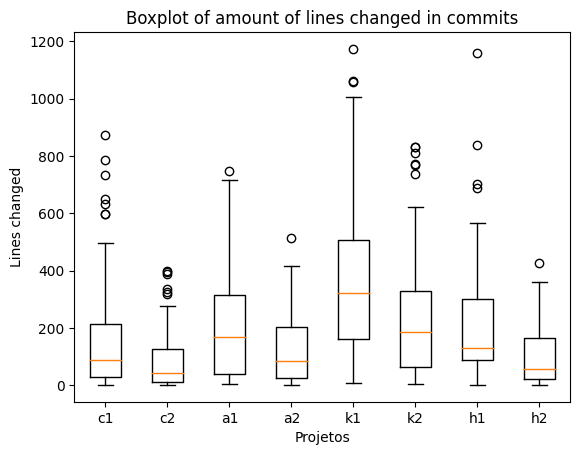

c1 (Cassandra) - issues with Architectural Impact
c2 (Cassandra) - issues without Architectural Impact
a1 (ActiveMQ) - issues with Architectural Impact
a2 (ActiveMQ) - issues without Architectural Impact
k1 (Kafka) - issues with Architectural Impact
k2 (Kafka) - issues without Architectural Impact
h1 (Hadoop) - issues with Architectural Impact
h2 (Hadoop) - issues without Architectural Impact


In [70]:
create_boxplot(lista_dados=[d1_cassandra_without_outliers, d2_cassandra_without_outliers, d3_activemq_without_outliers, d4_activemq_without_outliers, d3_kafka_without_outliers, d4_kafka_without_outliers, d3_hadoop_without_outliers, d4_hadoop_without_outliers], my_title='Boxplot of amount of lines changed in commits', my_xlabel='Projetos', my_ylabel='Lines changed', my_labels=['c1', 'c2', 'a1', 'a2', 'k1', 'k2', 'h1', 'h2'])
print('c1 (Cassandra) - issues with Architectural Impact')
print('c2 (Cassandra) - issues without Architectural Impact')
print('a1 (ActiveMQ) - issues with Architectural Impact')
print('a2 (ActiveMQ) - issues without Architectural Impact')
print('k1 (Kafka) - issues with Architectural Impact')
print('k2 (Kafka) - issues without Architectural Impact')
print('h1 (Hadoop) - issues with Architectural Impact')
print('h2 (Hadoop) - issues without Architectural Impact')

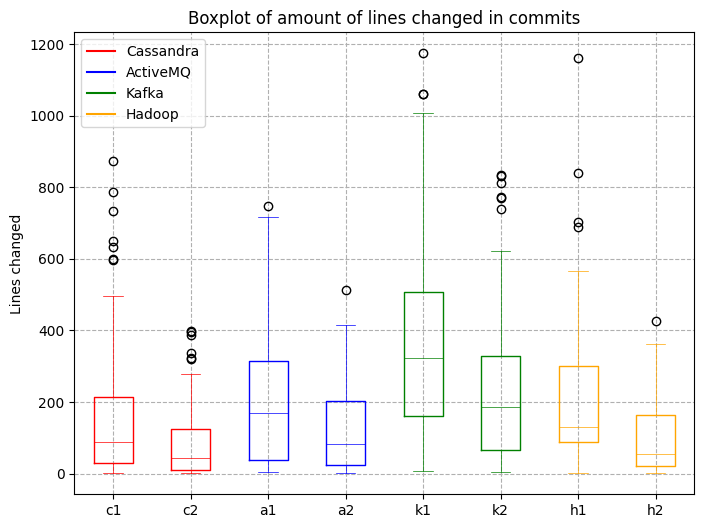

In [71]:
my_boxplot_rq1 = My_Boxplot(my_data=[d1_cassandra_without_outliers, d2_cassandra_without_outliers, d3_activemq_without_outliers, d4_activemq_without_outliers, d3_kafka_without_outliers, d4_kafka_without_outliers, d3_hadoop_without_outliers, d4_hadoop_without_outliers], my_title='Boxplot of amount of lines changed in commits', my_x_labels=['c1', 'c2', 'a1', 'a2', 'k1', 'k2', 'h1', 'h2'], my_y_label='Lines changed')
my_boxplot_rq1.show()

In [72]:
df_describe_loc_change_commits = describe_statistics(d1_cassandra_without_outliers, d2_cassandra_without_outliers, d3_activemq_without_outliers, d4_activemq_without_outliers, d3_kafka_without_outliers, d4_kafka_without_outliers, d3_hadoop_without_outliers, d4_hadoop_without_outliers)
df_describe_loc_change_commits

,c1,c2,a1,a2,k1,k2,h1,h2
count,92.00,129.00,53.00,78.00,73.00,106.00,37.00,85.00
mean,166.05,85.64,198.74,120.00,370.42,233.41,242.89,101.39
std,196.09,98.05,180.83,114.21,271.56,208.47,265.89,105.13
min,1.00,1.00,4.00,1.00,8.00,4.00,2.00,2.00
25%,28.50,10.00,39.00,25.50,161.00,65.00,88.00,21.00
50%,89.00,43.00,168.00,83.00,323.00,185.50,131.00,55.00
75%,215.25,126.00,315.00,202.50,508.00,329.25,301.00,164.00
max,872.00,397.00,748.00,514.00,1174.00,833.00,1160.00,426.00


### T1: HA - issues with architectural impact affect a substantial number of LOC changes in commits.

To test the hypothesis that issues with architectural impact affect a substantial number of LOC changes in commits:

**Null hypothesis (H0A)**: The number of LOC changed in commits affected by issues with architectural impact is not significantly different from the number of files affected by issues without architectural impact.

**Alternative hypothesis (H1A)**: The number of LOC changed in commits affected by issues with architectural impact is significantly greater than the number of LOC changes affected by issues without architectural impact.

**Alternative hypothesis (H2A)**: The number of LOC changed in commits affected by issues with architectural impact is significantly lower than the number of LOC changes affected by issues without architectural impact.

**T1:HA do Cassandra**

In [73]:
# Perform the Mann-Whitney U test.
resultado_t1_ha_cassandra = my_mann_whitney(dfx=d1_cassandra_without_outliers, dfy=d2_cassandra_without_outliers, my_type='LOC')

for k, v in resultado_t1_ha_cassandra.items():
  print(k, v)

test Mann-Whitney
h0 AI_LOC == NON_AI_LOC
h1 AI_LOC > NON_AI_LOC
h2 AI_LOC < NON_AI_LOC
accepted h1
h0stats 7466.5
h0p-value 0.001076273423599851
stats 7466.5
p-value 0.0005381367117999255
effec-size 0.5471651638319587


**T1:HA do ActiveMQ**

In [74]:
# Perform the Mann-Whitney U test.
resultado_t1_ha_activemq = my_mann_whitney(dfx=d3_activemq_without_outliers, dfy=d4_activemq_without_outliers, my_type='LOC')
for k, v in resultado_t1_ha_activemq.items():
  print(k, v)

test Mann-Whitney
h0 AI_LOC == NON_AI_LOC
h1 AI_LOC > NON_AI_LOC
h2 AI_LOC < NON_AI_LOC
accepted h1
h0stats 2568.0
h0p-value 0.018913763479679283
stats 2568.0
p-value 0.009456881739839641
effec-size 0.5437677109891863


**T1:HA do Kafka**

In [75]:
# Perform the Mann-Whitney U test.
resultado_t1_ha_kafka = my_mann_whitney(dfx=d3_kafka_without_outliers, dfy=d4_kafka_without_outliers, my_type='LOC')

for k, v in resultado_t1_ha_kafka.items():
  print(k,v)

test Mann-Whitney
h0 AI_LOC == NON_AI_LOC
h1 AI_LOC > NON_AI_LOC
h2 AI_LOC < NON_AI_LOC
accepted h1
h0stats 5138.0
h0p-value 0.0001965858981525896
stats 5138.0
p-value 9.82929490762948e-05
effec-size 0.580164299061809


**T1:HA do Hadoop**

In [76]:
# Perform the Mann-Whitney U test.
resultado_t1_ha_hadoop = my_mann_whitney(dfx=d3_hadoop_without_outliers, dfy=d4_hadoop_without_outliers, my_type='LOC')

for k, v in resultado_t1_ha_hadoop.items():
  print(k,v)

test Mann-Whitney
h0 AI_LOC == NON_AI_LOC
h1 AI_LOC > NON_AI_LOC
h2 AI_LOC < NON_AI_LOC
accepted h1
h0stats 2144.5
h0p-value 0.0014557971190805466
stats 2144.5
p-value 0.0007278985595402733
effec-size 0.8317106712491296


## Amount of modified files in commits

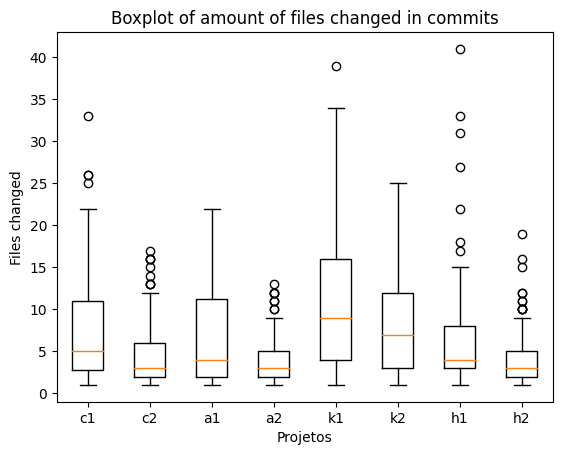

c1 (Cassandra) - issues with Architectural Impact
c2 (Cassandra) - issues without Architectural Impact
a1 (ActiveMQ) - issues with Architectural Impact
a2 (ActiveMQ) - issues without Architectural Impact
k1 (Kafka) - issues with Architectural Impact
k2 (Kafka) - issues without Architectural Impact
h1 (Hadoop) - issues with Architectural Impact
h2 (Hadoop) - issues without Architectural Impact


In [77]:
create_boxplot(lista_dados=[d5_cassandra_without_outliers, d6_cassandra_without_outliers, d7_activemq_without_outliers, d8_activemq_without_outliers, d7_kafka_without_outliers, d8_kafka_without_outliers, d7_hadoop_without_outliers, d8_hadoop_without_outliers], my_title='Boxplot of amount of files changed in commits', my_xlabel='Projetos', my_ylabel='Files changed', my_labels=['c1', 'c2', 'a1', 'a2', 'k1', 'k2', 'h1', 'h2'])
print('c1 (Cassandra) - issues with Architectural Impact')
print('c2 (Cassandra) - issues without Architectural Impact')
print('a1 (ActiveMQ) - issues with Architectural Impact')
print('a2 (ActiveMQ) - issues without Architectural Impact')
print('k1 (Kafka) - issues with Architectural Impact')
print('k2 (Kafka) - issues without Architectural Impact')
print('h1 (Hadoop) - issues with Architectural Impact')
print('h2 (Hadoop) - issues without Architectural Impact')

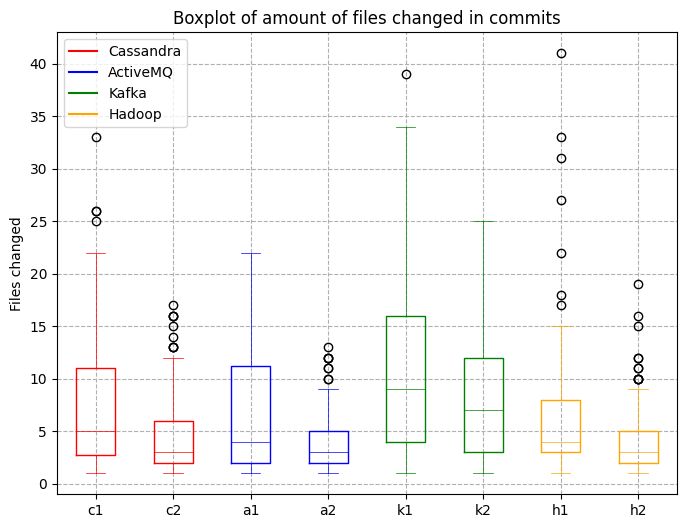

In [78]:
my_boxplot_rq2 = My_Boxplot(my_data=[d5_cassandra_without_outliers, d6_cassandra_without_outliers, d7_activemq_without_outliers, d8_activemq_without_outliers, d7_kafka_without_outliers, d8_kafka_without_outliers, d7_hadoop_without_outliers, d8_hadoop_without_outliers],
                            my_title='Boxplot of amount of files changed in commits',
	                          my_x_labels=['c1', 'c2', 'a1', 'a2', 'k1', 'k2', 'h1', 'h2'],
	                          my_y_label='Files changed')
my_boxplot_rq2.show()

In [79]:
df_describe_modified_files_commits = describe_statistics(d5_cassandra_without_outliers, d6_cassandra_without_outliers, d7_activemq_without_outliers, d8_activemq_without_outliers, d7_kafka_without_outliers, d8_kafka_without_outliers, d7_hadoop_without_outliers, d8_hadoop_without_outliers)
df_describe_modified_files_commits

,c1,c2,a1,a2,k1,k2,h1,h2
count,100.00,132.00,56.00,77.00,79.00,107.00,38.00,80.00
mean,7.76,4.73,6.71,3.97,11.72,7.70,8.45,4.53
std,6.89,3.88,5.82,3.29,8.77,5.58,9.98,3.72
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,2.75,2.00,2.00,2.00,4.00,3.00,3.00,2.00
50%,5.00,3.00,4.00,3.00,9.00,7.00,4.00,3.00
75%,11.00,6.00,11.25,5.00,16.00,12.00,8.00,5.00
max,33.00,17.00,22.00,13.00,39.00,25.00,41.00,19.00


 ### T2: HB - issues with architectural impact affect a substantial number of files

To test the hypothesis that issues with architectural impact affect a substantial number of files:

**Null hypothesis (H0B)**: The number of files affected by issues with architectural impact is not significantly different from the number of files affected by issues with less architectural impact.

**Alternative hypothesis (H1B)**: The number of files affected by issues with architectural impact is significantly greater than the number of files affected by issues with less architectural impact.

**Alternative hypothesis (H2B)**: The number of files affected by issues with architectural impact is significantly lower than the number of files affected by issues with less architectural impact.

**T2:HB do Cassandra**

In [80]:
# Perform the Mann-Whitney U test.
resultado_t2_hb_cassandra = my_mann_whitney(dfx=d5_cassandra_without_outliers, dfy=d6_cassandra_without_outliers, my_type='MODIFIED_FILES')

print('perform_mann_whitney_u_test')
for k, v in resultado_t2_hb_cassandra.items():
  print(k, v)

perform_mann_whitney_u_test
test Mann-Whitney
h0 AI_MODIFIED_FILES == NON_AI_MODIFIED_FILES
h1 AI_MODIFIED_FILES > NON_AI_MODIFIED_FILES
h2 AI_MODIFIED_FILES < NON_AI_MODIFIED_FILES
accepted h1
h0stats 8299.5
h0p-value 0.0007116790102442026
stats 8299.5
p-value 0.0003558395051221013
effec-size 0.562976737172719


**T2:HB do ActiveMQ**

In [81]:
# Perform the Mann-Whitney U test.
resultado_t2_hb_activemq = my_mann_whitney(d7_activemq_without_outliers, d8_activemq_without_outliers,'MODIFIED_FILES')

for k, v in resultado_t2_hb_activemq.items():
  print(k, v)

test Mann-Whitney
h0 AI_MODIFIED_FILES == NON_AI_MODIFIED_FILES
h1 AI_MODIFIED_FILES > NON_AI_MODIFIED_FILES
h2 AI_MODIFIED_FILES < NON_AI_MODIFIED_FILES
accepted h1
h0stats 2765.0
h0p-value 0.005077828002010423
stats 2765.0
p-value 0.0025389140010052113
effec-size 0.6050107765214946


**T2:HB do Kafka**

In [82]:
# Perform the Mann-Whitney U test.
resultado_t2_hb_kafka = my_mann_whitney(d7_kafka_without_outliers,d8_kafka_without_outliers,'MODIFIED_FILES')

for k, v in resultado_t2_hb_kafka.items():
  print(k,v)

test Mann-Whitney
h0 AI_MODIFIED_FILES == NON_AI_MODIFIED_FILES
h1 AI_MODIFIED_FILES > NON_AI_MODIFIED_FILES
h2 AI_MODIFIED_FILES < NON_AI_MODIFIED_FILES
accepted h1
h0stats 5367.5
h0p-value 0.0016427242412775228
stats 5367.5
p-value 0.0008213621206387614
effec-size 0.5655220449399715


**T2:HB do Hadoop**

In [83]:
# Perform the Mann-Whitney U test.
resultado_t2_hb_hadoop = my_mann_whitney(d7_hadoop_without_outliers,d8_hadoop_without_outliers,'MODIFIED_FILES')

for k, v in resultado_t2_hb_hadoop.items():
  print(k,v)

test Mann-Whitney
h0 AI_MODIFIED_FILES == NON_AI_MODIFIED_FILES
h1 AI_MODIFIED_FILES > NON_AI_MODIFIED_FILES
h2 AI_MODIFIED_FILES < NON_AI_MODIFIED_FILES
accepted h0
h0stats 1845.0
h0p-value 0.05692083438761023
stats 1845.0
p-value 0.05692083438761023
effec-size 0.6109453301362744


##  Time resolution of each issue

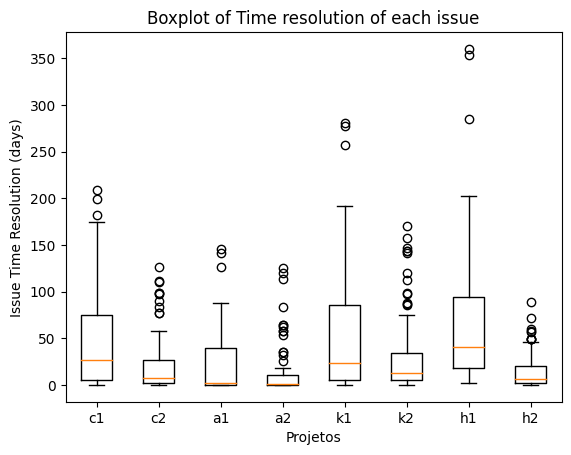

c1 (Cassandra) - issues with Architectural Impact
c2 (Cassandra) - issues without Architectural Impact
a1 (ActiveMQ) - issues with Architectural Impact
a2 (ActiveMQ) - issues without Architectural Impact
k1 (Kafka) - issues with Architectural Impact
k2 (Kafka) - issues without Architectural Impact
h1 (Hadoop) - issues with Architectural Impact
h2 (Hadoop) - issues without Architectural Impact


In [84]:
create_boxplot(lista_dados=[d9_cassandra_without_outliers, d10_cassandra_without_outliers,d11_activema_without_outliers,d12_activemq_without_outliers, d11_kafka_without_outliers,d12_kafka_without_outliers, d11_hadoop_without_outliers,d12_hadoop_without_outliers], my_title='Boxplot of Time resolution of each issue', my_xlabel='Projetos', my_ylabel='Issue Time Resolution (days)', my_labels=['c1', 'c2', 'a1', 'a2', 'k1', 'k2', 'h1', 'h2'])
print('c1 (Cassandra) - issues with Architectural Impact')
print('c2 (Cassandra) - issues without Architectural Impact')
print('a1 (ActiveMQ) - issues with Architectural Impact')
print('a2 (ActiveMQ) - issues without Architectural Impact')
print('k1 (Kafka) - issues with Architectural Impact')
print('k2 (Kafka) - issues without Architectural Impact')
print('h1 (Hadoop) - issues with Architectural Impact')
print('h2 (Hadoop) - issues without Architectural Impact')

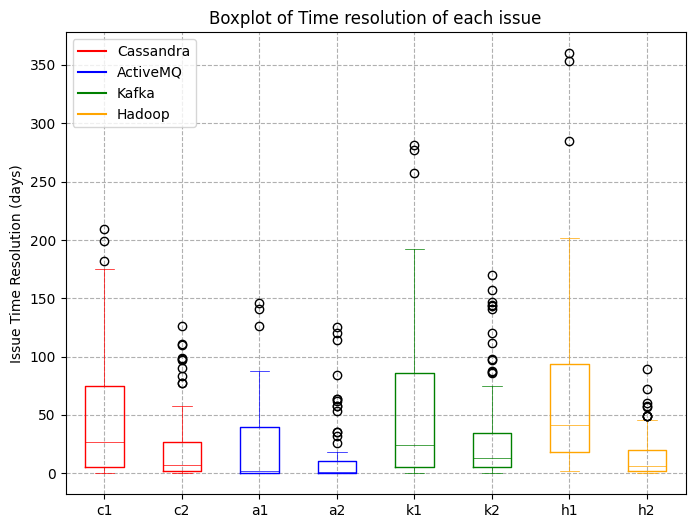

In [85]:
my_boxplot_rq3 = My_Boxplot(
	my_data=[d9_cassandra_without_outliers, d10_cassandra_without_outliers,d11_activema_without_outliers,d12_activemq_without_outliers, d11_kafka_without_outliers,d12_kafka_without_outliers, d11_hadoop_without_outliers,d12_hadoop_without_outliers],
	my_title='Boxplot of Time resolution of each issue',
	my_x_labels=['c1', 'c2', 'a1', 'a2', 'k1', 'k2', 'h1', 'h2'],
	my_y_label='Issue Time Resolution (days)')
my_boxplot_rq3.show()

In [86]:
df_describe_time_resolution_issues = describe_statistics(d9_cassandra_without_outliers, d10_cassandra_without_outliers,d11_activema_without_outliers,d12_activemq_without_outliers, d11_kafka_without_outliers,d12_kafka_without_outliers, d11_hadoop_without_outliers,d12_hadoop_without_outliers)
df_describe_time_resolution_issues

,c1,c2,a1,a2,k1,k2,h1,h2
count,87.00,110.00,44.00,66.00,63.00,94.00,42.00,84.00
mean,46.14,19.67,24.91,15.44,56.81,30.60,74.07,14.68
std,52.65,28.41,40.94,30.60,69.98,41.51,88.36,19.21
min,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00
25%,5.00,2.00,0.00,0.00,5.00,5.00,18.00,2.00
50%,27.00,7.00,2.00,1.00,24.00,13.00,41.00,6.00
75%,74.50,27.00,39.50,10.25,86.00,34.50,94.00,20.00
max,209.00,126.00,146.00,125.00,281.00,170.00,360.00,89.00


### T3: HC - issues with architectural impact require more time for resolution
To test the hypothesis that issues with architectural impact require more time for resolution:

**Null hypothesis (H0C)**: The time to resolution for issues with architectural impact is not significantly different from the time to resolution for issues with less architectural impact.

**Alternative hypothesis (H1C)**: The time to resolution for issues with architectural impact is significantly greater than the time to resolution for issues with less architectural impact.

**Alternative hypothesis (H2C)**: The time to resolution for issues with architectural impact is significantly lower than the time to resolution for issues with less architectural impact.

**T3:HC para Cassandra**

In [87]:
# Perform the Mann-Whitney U test.
resultado_t3_hc_cassandra = my_mann_whitney(d9_cassandra_without_outliers, d10_cassandra_without_outliers,'TIME_RESOLUTION')

for k, v in resultado_t3_hc_cassandra.items():
  print(k,v)

test Mann-Whitney
h0 AI_TIME_RESOLUTION == NON_AI_TIME_RESOLUTION
h1 AI_TIME_RESOLUTION > NON_AI_TIME_RESOLUTION
h2 AI_TIME_RESOLUTION < NON_AI_TIME_RESOLUTION
accepted h1
h0stats 6252.5
h0p-value 0.0002182248051426975
stats 6252.5
p-value 0.00010911240257134876
effec-size 0.6469593316778651


**T3:HC para o ActiveMQ**

In [88]:
# Perform the Mann-Whitney U test.
resultado_t3_hc_activemq = my_mann_whitney(d11_activema_without_outliers,d12_activemq_without_outliers, 'TIME_RESOLUTION')

for k, v in resultado_t3_hc_activemq.items():
  print(k, v)

test Mann-Whitney
h0 AI_TIME_RESOLUTION == NON_AI_TIME_RESOLUTION
h1 AI_TIME_RESOLUTION > NON_AI_TIME_RESOLUTION
h2 AI_TIME_RESOLUTION < NON_AI_TIME_RESOLUTION
accepted h0
h0stats 1655.0
h0p-value 0.1953496062458281
stats 1655.0
p-value 0.1953496062458281
effec-size 0.269894579487019


**T3:HC para o Kafka**

In [89]:
# Perform the Mann-Whitney U test.
resultado_t3_hc_kafka = my_mann_whitney(d11_kafka_without_outliers,d12_kafka_without_outliers, 'TIME_RESOLUTION')

for k, v in resultado_t3_hc_kafka.items():
  print(k, v)

test Mann-Whitney
h0 AI_TIME_RESOLUTION == NON_AI_TIME_RESOLUTION
h1 AI_TIME_RESOLUTION > NON_AI_TIME_RESOLUTION
h2 AI_TIME_RESOLUTION < NON_AI_TIME_RESOLUTION
accepted h1
h0stats 3583.5
h0p-value 0.02584362808450905
stats 3583.5
p-value 0.012921814042254525
effec-size 0.47917214002846353


**T3:HC para o Hadoop**

In [90]:
# Perform the Mann-Whitney U test.
resultado_t3_hc_hadoop = my_mann_whitney(d11_hadoop_without_outliers,d12_hadoop_without_outliers, 'TIME_RESOLUTION')

for k, v in resultado_t3_hc_hadoop.items():
  print(k, v)

test Mann-Whitney
h0 AI_TIME_RESOLUTION == NON_AI_TIME_RESOLUTION
h1 AI_TIME_RESOLUTION > NON_AI_TIME_RESOLUTION
h2 AI_TIME_RESOLUTION < NON_AI_TIME_RESOLUTION
accepted h1
h0stats 2916.0
h0p-value 2.4599776769344914e-09
stats 2916.0
p-value 1.2299888384672457e-09
effec-size 1.1167104558809364


## Commits with SATD x Commits without SATD

Comparing Commits with SATD (issues with architectural impact) and Commits without SATD (issues without architectural impact)


### T4:HD - Commits with SATD and issues with architectural affect a substantial number of LOC changes

**Null Hypothesis (H0D)**: Don't these commits affect as many LOCs as those without SATD?

**Alternative hypothesis (H1D)**: Do these commits affect more LOC than those without SATD?

**Alternative hypothesis (H2D)**: Do these commits affect less LOC than those without SATD?

In [91]:
df_extra1_cassandra_commits_issues_yes_ai = pd.read_excel('cassandra_commits_issues_yes_ai_satd.xlsx')
df_extra1_cassandra_commits_issues_no_ai_no_satd = pd.read_excel('cassandra_commits_issues_no_ai_no_satd.xlsx')
df_extra1_kafka_commits_issues_yes_ai = pd.read_excel('kafka_commits_issues_yes_ai_satd.xlsx')
df_extra1_kafka_commits_issues_no_ai = pd.read_excel('kafka_commits_issues_no_ai_no_satd.xlsx')
df_extra1_activemq_commits_issues_yes_ai = pd.read_excel('activemq_commits_issues_yes_ai_satd.xlsx')
df_extra1_activemq_commits_issues_no_ai = pd.read_excel('activemq_commits_issues_no_ai_no_satd.xlsx')
df_extra1_hadoop_commits_issues_yes_ai = pd.read_excel('hadoop_commits_issues_yes_ai_satd.xlsx')
df_extra1_hadoop_commits_issues_no_ai = pd.read_excel('hadoop_commits_issues_no_ai_no_satd.xlsx')

In [92]:
d1_extra1_cassandra_without_outliers, d2_extra1_cassandra_without_outliers = my_remove_outliers(df_extra1_cassandra_commits_issues_yes_ai,df_extra1_cassandra_commits_issues_no_ai_no_satd)
d1_extra1_kafka_without_outliers, d2_extra1_kafka_without_outliers = my_remove_outliers(df_extra1_kafka_commits_issues_yes_ai, df_extra1_kafka_commits_issues_no_ai)
d1_extra1_activemq_without_outliers, d2_extra1_activemq_without_outliers = my_remove_outliers(df_extra1_activemq_commits_issues_yes_ai, df_extra1_activemq_commits_issues_no_ai)
d1_extra1_hadoop_without_outliers, d2_extra1_hadoop_without_outliers = my_remove_outliers(df_extra1_hadoop_commits_issues_yes_ai, df_extra1_hadoop_commits_issues_no_ai)

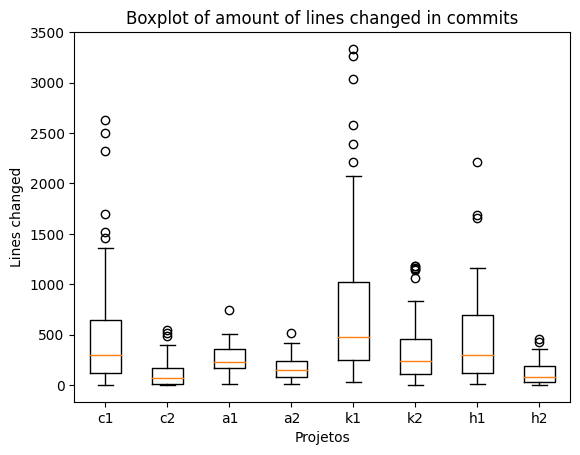

c1 (Cassandra) - commits with SATD and issues with Architectural Impact
c2 (Cassandra) - commits without SATD and issues without Architectural Impact
a1 (ActiveMQ) - commits with SATD and issues with Architectural Impact
a2 (ActiveMQ) - commits without SATD and issues without Architectural Impact
k1 (Kafka) - commits with SATD and issues with Architectural Impact
k2 (Kafka) - commits without SATD and issues without Architectural Impact
h1 (Hadoop) - commits with SATD and issues with Architectural Impact
h2 (Hadoop) - commits without SATD and issues without Architectural Impact


In [93]:
create_boxplot(lista_dados=[d1_extra1_cassandra_without_outliers, d2_extra1_cassandra_without_outliers, d1_extra1_activemq_without_outliers, d2_extra1_activemq_without_outliers, d1_extra1_kafka_without_outliers, d2_extra1_kafka_without_outliers,d1_extra1_hadoop_without_outliers, d2_extra1_hadoop_without_outliers], my_title='Boxplot of amount of lines changed in commits', my_xlabel='Projetos', my_ylabel='Lines changed', my_labels=['c1', 'c2', 'a1', 'a2', 'k1','k2','h1', 'h2'])
print('c1 (Cassandra) - commits with SATD and issues with Architectural Impact')
print('c2 (Cassandra) - commits without SATD and issues without Architectural Impact')
print('a1 (ActiveMQ) - commits with SATD and issues with Architectural Impact')
print('a2 (ActiveMQ) - commits without SATD and issues without Architectural Impact')
print('k1 (Kafka) - commits with SATD and issues with Architectural Impact')
print('k2 (Kafka) - commits without SATD and issues without Architectural Impact')
print('h1 (Hadoop) - commits with SATD and issues with Architectural Impact')
print('h2 (Hadoop) - commits without SATD and issues without Architectural Impact')


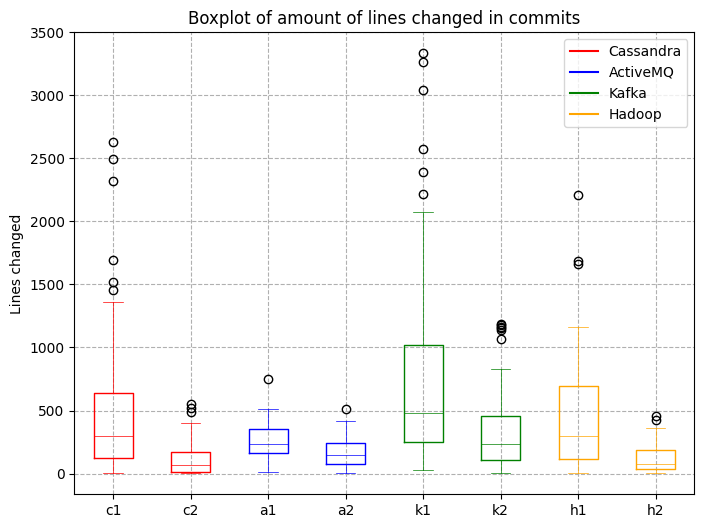

In [94]:
my_boxplot_rq4 = My_Boxplot(
	my_data=[d1_extra1_cassandra_without_outliers, d2_extra1_cassandra_without_outliers, d1_extra1_activemq_without_outliers, d2_extra1_activemq_without_outliers, d1_extra1_kafka_without_outliers, d2_extra1_kafka_without_outliers,d1_extra1_hadoop_without_outliers, d2_extra1_hadoop_without_outliers],
	my_title='Boxplot of amount of lines changed in commits',
	my_x_labels=['c1', 'c2', 'a1', 'a2', 'k1', 'k2', 'h1', 'h2'],
	my_y_label='Lines changed')
my_boxplot_rq4.show()

In [95]:
df_describe_commits_satd_issues = describe_statistics(d1_extra1_cassandra_without_outliers, d2_extra1_cassandra_without_outliers, d1_extra1_activemq_without_outliers, d2_extra1_activemq_without_outliers, d1_extra1_kafka_without_outliers, d2_extra1_kafka_without_outliers,d1_extra1_hadoop_without_outliers, d2_extra1_hadoop_without_outliers)
df_describe_commits_satd_issues

,c1,c2,a1,a2,k1,k2,h1,h2
count,47.00,108.00,16.00,52.00,48.00,91.00,23.00,60.00
mean,564.81,110.71,280.94,163.63,823.56,328.32,551.26,125.00
std,670.96,122.75,185.54,112.39,889.33,301.29,597.59,118.27
min,4.00,2.00,13.00,7.00,27.00,4.00,7.00,4.00
25%,121.50,14.50,166.75,76.75,253.75,109.00,118.00,35.75
50%,295.00,70.50,233.50,146.00,479.50,235.00,301.00,79.00
75%,641.50,171.25,354.75,239.50,1019.25,453.50,697.00,185.50
max,2633.00,548.00,748.00,514.00,3334.00,1184.00,2212.00,458.00


**T4:H0 - Cassandra**

In [96]:
# Perform the Mann-Whitney U test.
resultado_t4_ha_cassandra =  my_mann_whitney(d1_extra1_cassandra_without_outliers, d2_extra1_cassandra_without_outliers,'LOC')

for k, v in resultado_t4_ha_cassandra.items():
  print(k, v)

test Mann-Whitney
h0 AI_LOC == NON_AI_LOC
h1 AI_LOC > NON_AI_LOC
h2 AI_LOC < NON_AI_LOC
accepted h1
h0stats 4071.0
h0p-value 2.427366817403663e-09
stats 4071.0
p-value 1.2136834087018314e-09
effec-size 1.1888854537193647


**T4:H0 - Kafka**

In [97]:
# Perform the Mann-Whitney U test.
resultado_t4_ha_kafka =  my_mann_whitney(d1_extra1_kafka_without_outliers, d2_extra1_kafka_without_outliers,'LOC')

for k, v in resultado_t4_ha_kafka.items():
  print(k, v)

test Mann-Whitney
h0 AI_LOC == NON_AI_LOC
h1 AI_LOC > NON_AI_LOC
h2 AI_LOC < NON_AI_LOC
accepted h1
h0stats 3049.0
h0p-value 0.00012835270977933118
stats 3049.0
p-value 6.417635488966559e-05
effec-size 0.8608436143400757


**T4:H0 - ActiveMQ**

In [98]:
# Perform the Mann-Whitney U test.
resultado_t4_ha_activemq =  my_mann_whitney(d1_extra1_activemq_without_outliers, d2_extra1_activemq_without_outliers,'LOC')

for k, v in resultado_t4_ha_activemq.items():
  print(k, v)

test Mann-Whitney
h0 AI_LOC == NON_AI_LOC
h1 AI_LOC > NON_AI_LOC
h2 AI_LOC < NON_AI_LOC
accepted h1
h0stats 582.0
h0p-value 0.016719272617835932
stats 582.0
p-value 0.008359636308917966
effec-size 0.8845720309950171


**T4:H0 - Hadoop**

In [99]:
# Perform the Mann-Whitney U test.
resultado_t4_ha_hadoop =  my_mann_whitney(d1_extra1_hadoop_without_outliers, d2_extra1_hadoop_without_outliers,'LOC')

for k, v in resultado_t4_ha_hadoop.items():
  print(k, v)

test Mann-Whitney
h0 AI_LOC == NON_AI_LOC
h1 AI_LOC > NON_AI_LOC
h2 AI_LOC < NON_AI_LOC
accepted h1
h0stats 1104.0
h0p-value 2.582192357440046e-05
stats 1104.0
p-value 1.291096178720023e-05
effec-size 1.301999974404253


### T5:HE - Commits with SATD and issues with architectural affect a substantial modified files changes

**Null Hypothesis (H0E):** Don't these commits modify as many files as those without SATD?

**Alternative hypothesis (H1E):** Do these commits affect more files than those without SATD?

**Alternative hypothesis (H2E):** Do these commits affect fewer files than those without SATD?

In [100]:
d1_extra1_cassandra_issues_ai_yes_files = df_extra1_cassandra_commits_issues_yes_ai.files
d1_extra1_cassandra_without_outliers_files = remove_outliers_from_serie(d1_extra1_cassandra_issues_ai_yes_files)
d2_extra1_cassandra_commits_issues_no_ai_no_satd_files = df_extra1_cassandra_commits_issues_no_ai_no_satd.files
d2_extra1_cassandra_without_outliers_files = remove_outliers_from_serie(d2_extra1_cassandra_commits_issues_no_ai_no_satd_files)

In [101]:
d1_extra1_kafka_issues_ai_yes_files = df_extra1_kafka_commits_issues_yes_ai.files
d1_extra1_kafka_without_outliers_files = remove_outliers_from_serie(d1_extra1_kafka_issues_ai_yes_files)
d2_extra1_kafka_commits_issues_no_ai_no_satd_files = df_extra1_kafka_commits_issues_no_ai.files
d2_extra1_kafka_without_outliers_files = remove_outliers_from_serie(d2_extra1_kafka_commits_issues_no_ai_no_satd_files)

In [102]:
d1_extra1_activemq_issues_ai_yes_files = df_extra1_activemq_commits_issues_yes_ai.files
d1_extra1_activemq_without_outliers_files = remove_outliers_from_serie(d1_extra1_activemq_issues_ai_yes_files)
d2_extra1_activemq_commits_issues_no_ai_no_satd_files = df_extra1_activemq_commits_issues_no_ai.files
d2_extra1_activemq_without_outliers_files = remove_outliers_from_serie(d2_extra1_activemq_commits_issues_no_ai_no_satd_files)

In [103]:
d1_extra1_hadoop_issues_ai_yes_files = df_extra1_hadoop_commits_issues_yes_ai.files
d1_extra1_hadoop_without_outliers_files = remove_outliers_from_serie(d1_extra1_hadoop_issues_ai_yes_files)
d2_extra1_hadoop_commits_issues_no_ai_no_satd_files = df_extra1_hadoop_commits_issues_no_ai.files
d2_extra1_hadoop_without_outliers_files = remove_outliers_from_serie(d2_extra1_hadoop_commits_issues_no_ai_no_satd_files)

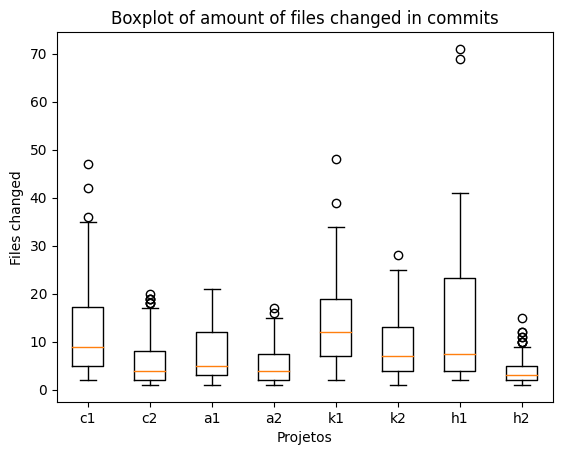

c1 (Cassandra) - commits with SATD and issues with Architectural Impact
c2 (Cassandra) - commits without SATD and issues without Architectural Impact
a1 (ActiveMQ) - commits with SATD and issues with Architectural Impact
a2 (ActiveMQ) - commits without SATD and issues without Architectural Impact
k1 (Kafka) - commits with SATD and issues with Architectural Impact
k2 (Kafka) - commits without SATD and issues without Architectural Impact
h1 (Hadoop) - commits with SATD and issues with Architectural Impact
h2 (Hadoop) - commits without SATD and issues without Architectural Impact


In [104]:
create_boxplot(lista_dados=[d1_extra1_cassandra_without_outliers_files, d2_extra1_cassandra_without_outliers_files,d1_extra1_activemq_without_outliers_files, d2_extra1_activemq_without_outliers_files,d1_extra1_kafka_without_outliers_files, d2_extra1_kafka_without_outliers_files, d1_extra1_hadoop_without_outliers_files, d2_extra1_hadoop_without_outliers_files],
               my_title='Boxplot of amount of files changed in commits',
               my_xlabel='Projetos',
               my_ylabel='Files changed', my_labels=['c1', 'c2', 'a1', 'a2','k1', 'k2', 'h1', 'h2'])
print('c1 (Cassandra) - commits with SATD and issues with Architectural Impact')
print('c2 (Cassandra) - commits without SATD and issues without Architectural Impact')
print('a1 (ActiveMQ) - commits with SATD and issues with Architectural Impact')
print('a2 (ActiveMQ) - commits without SATD and issues without Architectural Impact')
print('k1 (Kafka) - commits with SATD and issues with Architectural Impact')
print('k2 (Kafka) - commits without SATD and issues without Architectural Impact')
print('h1 (Hadoop) - commits with SATD and issues with Architectural Impact')
print('h2 (Hadoop) - commits without SATD and issues without Architectural Impact')

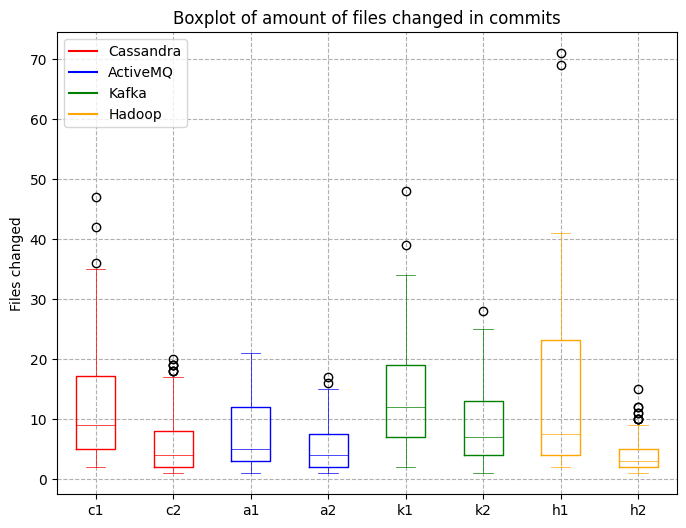

In [105]:
my_boxplot_rq5 = My_Boxplot(
	my_data=[d1_extra1_cassandra_without_outliers_files, d2_extra1_cassandra_without_outliers_files,d1_extra1_activemq_without_outliers_files, d2_extra1_activemq_without_outliers_files,d1_extra1_kafka_without_outliers_files, d2_extra1_kafka_without_outliers_files, d1_extra1_hadoop_without_outliers_files, d2_extra1_hadoop_without_outliers_files],
	my_title='Boxplot of amount of files changed in commits',
	my_x_labels=['c1', 'c2', 'a1', 'a2', 'k1', 'k2', 'h1', 'h2'],
	my_y_label='Files changed')
my_boxplot_rq5.show()

In [106]:
df_describe_commits_satd_issues_files = describe_statistics(d1_extra1_cassandra_without_outliers_files, d2_extra1_cassandra_without_outliers_files,d1_extra1_activemq_without_outliers_files, d2_extra1_activemq_without_outliers_files,d1_extra1_kafka_without_outliers_files, d2_extra1_kafka_without_outliers_files, d1_extra1_hadoop_without_outliers_files, d2_extra1_hadoop_without_outliers_files)
df_describe_commits_satd_issues_files

,c1,c2,a1,a2,k1,k2,h1,h2
count,48.00,115.00,17.00,55.00,45.00,89.00,24.00,57.00
mean,13.15,6.14,8.06,5.45,14.11,8.64,17.17,4.58
std,11.07,5.05,6.10,4.22,10.62,6.02,19.71,3.31
min,2.00,1.00,1.00,1.00,2.00,1.00,2.00,1.00
25%,5.00,2.00,3.00,2.00,7.00,4.00,4.00,2.00
50%,9.00,4.00,5.00,4.00,12.00,7.00,7.50,3.00
75%,17.25,8.00,12.00,7.50,19.00,13.00,23.25,5.00
max,47.00,20.00,21.00,17.00,48.00,28.00,71.00,15.00


**T5:H0 - Cassandra**

In [107]:
# Perform the Mann-Whitney U test.
resultado_t5_ha_cassandra = my_mann_whitney(d1_extra1_cassandra_without_outliers_files, d2_extra1_cassandra_without_outliers_files, 'MODIFIED_FILES')

for k, v in resultado_t5_ha_cassandra.items():
  print(k, v)

test Mann-Whitney
h0 AI_MODIFIED_FILES == NON_AI_MODIFIED_FILES
h1 AI_MODIFIED_FILES > NON_AI_MODIFIED_FILES
h2 AI_MODIFIED_FILES < NON_AI_MODIFIED_FILES
accepted h1
h0stats 4032.0
h0p-value 3.16903299698041e-06
stats 4032.0
p-value 1.584516498490205e-06
effec-size 0.9550442312474646


**T5:H0 - Kafka**

In [108]:
# Perform the Mann-Whitney U test.
resultado_t5_ha_kafka = my_mann_whitney(d1_extra1_kafka_without_outliers_files, d2_extra1_kafka_without_outliers_files, 'MODIFIED_FILES')

for k, v in resultado_t5_ha_kafka.items():
  print(k, v)

test Mann-Whitney
h0 AI_MODIFIED_FILES == NON_AI_MODIFIED_FILES
h1 AI_MODIFIED_FILES > NON_AI_MODIFIED_FILES
h2 AI_MODIFIED_FILES < NON_AI_MODIFIED_FILES
accepted h1
h0stats 2641.5
h0p-value 0.0025881891801712606
stats 2641.5
p-value 0.0012940945900856303
effec-size 0.6963532311282566


**T5:H0 - ActiveMQ**

In [109]:
# Perform the Mann-Whitney U test.
resultado_t5_ha_activemq = my_mann_whitney(d1_extra1_activemq_without_outliers_files, d2_extra1_activemq_without_outliers_files, 'MODIFIED_FILES')

for k, v in resultado_t5_ha_activemq.items():
  print(k, v)

test Mann-Whitney
h0 AI_MODIFIED_FILES == NON_AI_MODIFIED_FILES
h1 AI_MODIFIED_FILES > NON_AI_MODIFIED_FILES
h2 AI_MODIFIED_FILES < NON_AI_MODIFIED_FILES
accepted h0
h0stats 596.5
h0p-value 0.08607495798231742
stats 596.5
p-value 0.08607495798231742
effec-size 0.5526245575858886


**T5:H0 - Hadoop**

In [110]:
# Perform the Mann-Whitney U test.
resultado_t5_ha_hadoop = my_mann_whitney(d1_extra1_hadoop_without_outliers_files, d2_extra1_hadoop_without_outliers_files, 'MODIFIED_FILES')

for k, v in resultado_t5_ha_hadoop.items():
  print(k, v)

test Mann-Whitney
h0 AI_MODIFIED_FILES == NON_AI_MODIFIED_FILES
h1 AI_MODIFIED_FILES > NON_AI_MODIFIED_FILES
h2 AI_MODIFIED_FILES < NON_AI_MODIFIED_FILES
accepted h1
h0stats 1037.5
h0p-value 0.00022081616297725076
stats 1037.5
p-value 0.00011040808148862538
effec-size 1.145043396976263


# Conclusões

Issues que possuem impacto arquitetural (Yes) tem as seguintes **características**:

- eles impactam muitos arquivos (T1:HA)
- eles alteram muitas linhas de código (T2:HB)
- eles demoram mais tempo para serem resolvidos (T3:HC)

Além disso, observamos também que commits com SATD nas mensagens e diffs e que estes commits tenham issues com impacto arquitetural (Yes) tem as seguintes características:

- eles impactam mais arquivos que os commits sem SATD (T4:HD)
- eles alteram mais LOCs do que os commits sem SATD (T5:HE)

## Justificativa

Baseado na comparação dos resultados dos issues com impacto arquitetural dos repositórios Cassandra, ActiveMQ, Kafka e Hadoop.

Comparação dos resultados da quantidade de linhas e quantidade de arquivos modificados nos commits do issues com impacto arquitetural (Yes) .

Comparação dos resultados do tempo médio de resolução dos issues com impactor arquitetural (Yes).

Os issues inspecionados que aparecem nos commits com arquivos criticos e tem impacto arquitetural mostram que as classes critical podem impactar a arquitetura do software.

# Extra: Séries Temporais

Variação temporal dos issues com impacto arquitetural ao longo dos anos

## Cassandra

In [111]:
df_ciccc = df_cassandra_issues_commits_critical_classes[['issue_key', 'created_date']]
df1 = df_ciccc.copy()
df_ciccc

,issue_key,created_date
0,CASSANDRA-261,2009-06-26
1,CASSANDRA-259,2009-06-26
2,CASSANDRA-254,2009-06-24
3,CASSANDRA-251,2009-06-24
4,CASSANDRA-248,2009-06-21
...,...,...
2907,CASSANDRA-18504,2023-05-05
2908,CASSANDRA-18500,2023-05-04
2909,CASSANDRA-18816,2023-09-01
2910,CASSANDRA-18803,2023-08-29


In [112]:
df_cii_yes = df_cassandra_issues_inspected[df_cassandra_issues_inspected['architectural_impact'] == 'YES']
df_cii_yes = df_cii_yes[['issue_key', 'summary']]
df2 = df_cii_yes.copy()
df_cii_yes

,issue_key,summary
0,CASSANDRA-235,Move system CFs into own Table
1,CASSANDRA-212,Range queries do not yet span multiple nodes
5,CASSANDRA-71,Range query support
7,CASSANDRA-512,regression prevents recognizing local reads
9,CASSANDRA-414,remove sstableLock
...,...,...
218,CASSANDRA-18430,When decommissioning should set Severity to li...
219,CASSANDRA-18320,Incompatible file system thrown while running ...
221,CASSANDRA-18153,Memtable being flushed without hostId in versi...
223,CASSANDRA-18681,Internode legacy SSL storage port certificate ...


In [113]:
# Merge DataFrames by Column
df3=pd.merge(df1,df2, on='issue_key')
df3

,issue_key,created_date,summary
0,CASSANDRA-235,2009-06-17,Move system CFs into own Table
1,CASSANDRA-212,2009-06-03,Range queries do not yet span multiple nodes
2,CASSANDRA-71,2009-04-10,Range query support
3,CASSANDRA-512,2009-10-23,regression prevents recognizing local reads
4,CASSANDRA-414,2009-09-02,remove sstableLock
...,...,...,...
91,CASSANDRA-18430,2023-04-05,When decommissioning should set Severity to li...
92,CASSANDRA-18320,2023-03-10,Incompatible file system thrown while running ...
93,CASSANDRA-18153,2023-01-12,Memtable being flushed without hostId in versi...
94,CASSANDRA-18681,2023-07-21,Internode legacy SSL storage port certificate ...


In [114]:
df3['year'] = pd.to_datetime(df3['created_date']).dt.year
df3

,issue_key,created_date,summary,year
0,CASSANDRA-235,2009-06-17,Move system CFs into own Table,2009
1,CASSANDRA-212,2009-06-03,Range queries do not yet span multiple nodes,2009
2,CASSANDRA-71,2009-04-10,Range query support,2009
3,CASSANDRA-512,2009-10-23,regression prevents recognizing local reads,2009
4,CASSANDRA-414,2009-09-02,remove sstableLock,2009
...,...,...,...,...
91,CASSANDRA-18430,2023-04-05,When decommissioning should set Severity to li...,2023
92,CASSANDRA-18320,2023-03-10,Incompatible file system thrown while running ...,2023
93,CASSANDRA-18153,2023-01-12,Memtable being flushed without hostId in versi...,2023
94,CASSANDRA-18681,2023-07-21,Internode legacy SSL storage port certificate ...,2023


In [115]:
issues_per_year = df3.groupby(['year']).size()
new_df = issues_per_year.to_frame(name='issues_count').reset_index()
df_cassandra_iaiyes_by_year = new_df.copy()
df_cassandra_iaiyes_by_year

,year,issues_count
0,2009,6
1,2010,13
2,2011,18
3,2012,4
4,2013,7
5,2014,7
6,2015,6
7,2016,7
8,2017,3
9,2018,1


In [116]:
import numpy as np
import matplotlib.pyplot as plt

class GraficoSerieTemporal:
    def __init__(self):
        self.x = None
        self.y = None

    def set_eixo_x(self,x):
      self.x = x

    def set_eixo_y(self,y):
      self.y =y

    def criar_eixo_x(self, inicio, fim, quantidade):
        self.x = np.linspace(inicio, fim, quantidade)

    def calcular_y(self, funcao):
        self.y = funcao(self.x)

    def configura_limites_dos_eixos(self, limite_inferior_x=None, limite_superior_x=None, limite_inferior_y=None, limite_superior_y=None):
        if ((limite_inferior_x is not None) and (limite_superior_x is not None) and (limite_inferior_y is not None) and (limite_superior_y is not None)):
            plt.xlim([limite_inferior_x, limite_superior_x])
            plt.ylim([limite_inferior_y, limite_superior_y])

    def configura_titulo_e_rotulos(self, titulo=None, rotulo_x=None, rotulo_y=None):
        if titulo is not None:
            plt.title(titulo)
        if rotulo_x is not None:
            plt.xlabel(rotulo_x)
        if rotulo_y is not None:
            plt.ylabel(rotulo_y)

    def exibir_gráfico(self):
        plt.plot(self.x, self.y)
        plt.show()

In [117]:
anos = df_cassandra_iaiyes_by_year.year
qtd_issues = df_cassandra_iaiyes_by_year.issues_count

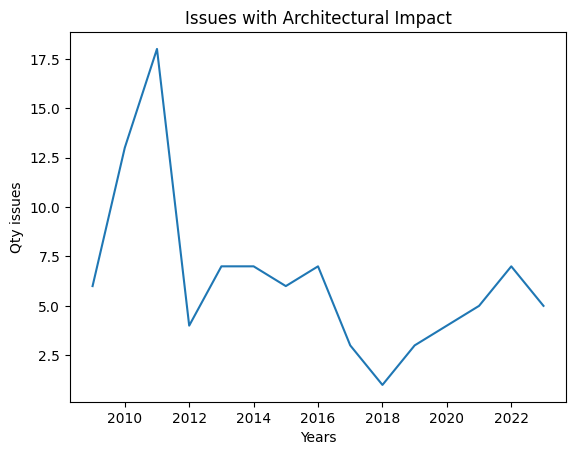

In [118]:
# Exemplo de uso da classe Gráfico
grafico_cassandra_issues = GraficoSerieTemporal()
grafico_cassandra_issues.set_eixo_x(x=anos)
grafico_cassandra_issues.set_eixo_y(y=qtd_issues)
grafico_cassandra_issues.configura_titulo_e_rotulos(titulo='Issues with Architectural Impact', rotulo_x='Years', rotulo_y='Qty issues')
grafico_cassandra_issues.exibir_gráfico()

## ActiveMQ

In [119]:
df_aiccc = df_activemq_issues_commits_critical_classes[['issue_key', 'created_date']]
df1a = df_aiccc.copy()
df_aiccc

,issue_key,created_date
0,AMQ-2199,2009-04-08
1,AMQ-2198,2009-04-07
2,AMQ-2183,2009-03-25
3,AMQ-2180,2009-03-24
4,AMQ-2149,2009-03-06
...,...,...
475,AMQ-9153,2022-11-01
476,AMQ-9262,2023-06-06
477,AMQ-9257,2023-05-10
478,AMQ-9239,2023-03-30


In [120]:
df_aii_yes = df_activemq_issues_inspected[df_activemq_issues_inspected['architectural_impact'] == 'YES']
df_aii_yes = df_aii_yes[['issue_key', 'summary']]
df2a = df_aii_yes.copy()
df_aii_yes

,issue_key,summary
0,AMQ-2149,Shared Filesystem Master Slave: missing messages
2,AMQ-2106,Allow broker to evenly distribute message grou...
14,AMQ-2527,Intermittent hang of AMQ2102Test with ibm jdk ...
15,AMQ-2507,When using a producer/session with a send time...
16,AMQ-2483,OOM due to build of of iterate executions duri...
17,AMQ-2468,Calling purge on a large queue causes OutOfMem...
19,AMQ-2706,Memory leak & huge thread count in broker
20,AMQ-2702,Localize Spring-related classes in a separate ...
21,AMQ-2668,Allow setting storeUsage limit per individual ...
22,AMQ-2665,Durable subscription re-activation failed when...


In [121]:
# Merge DataFrames by Column
df3a=pd.merge(df1a,df2a, on='issue_key')
df3a

,issue_key,created_date,summary
0,AMQ-2149,2009-03-06,Shared Filesystem Master Slave: missing messages
1,AMQ-2106,2009-02-12,Allow broker to evenly distribute message grou...
2,AMQ-2527,2009-12-09,Intermittent hang of AMQ2102Test with ibm jdk ...
3,AMQ-2507,2009-11-23,When using a producer/session with a send time...
4,AMQ-2483,2009-11-11,OOM due to build of of iterate executions duri...
5,AMQ-2468,2009-10-28,Calling purge on a large queue causes OutOfMem...
6,AMQ-2706,2010-04-22,Memory leak & huge thread count in broker
7,AMQ-2702,2010-04-20,Localize Spring-related classes in a separate ...
8,AMQ-2668,2010-03-24,Allow setting storeUsage limit per individual ...
9,AMQ-2665,2010-03-24,Durable subscription re-activation failed when...


In [122]:
df3a['year'] = pd.to_datetime(df3a['created_date']).dt.year
df3a

,issue_key,created_date,summary,year
0,AMQ-2149,2009-03-06,Shared Filesystem Master Slave: missing messages,2009
1,AMQ-2106,2009-02-12,Allow broker to evenly distribute message grou...,2009
2,AMQ-2527,2009-12-09,Intermittent hang of AMQ2102Test with ibm jdk ...,2009
3,AMQ-2507,2009-11-23,When using a producer/session with a send time...,2009
4,AMQ-2483,2009-11-11,OOM due to build of of iterate executions duri...,2009
5,AMQ-2468,2009-10-28,Calling purge on a large queue causes OutOfMem...,2009
6,AMQ-2706,2010-04-22,Memory leak & huge thread count in broker,2010
7,AMQ-2702,2010-04-20,Localize Spring-related classes in a separate ...,2010
8,AMQ-2668,2010-03-24,Allow setting storeUsage limit per individual ...,2010
9,AMQ-2665,2010-03-24,Durable subscription re-activation failed when...,2010


In [123]:
issues_per_year_a = df3a.groupby(['year']).size()
new_df_a = issues_per_year_a.to_frame(name='issues_count').reset_index()
df_active_mq_iaiyes_by_year = new_df_a.copy()
df_active_mq_iaiyes_by_year

,year,issues_count
0,2009,6
1,2010,7
2,2011,14
3,2012,3
4,2013,6
5,2014,2
6,2015,5
7,2017,2
8,2018,3
9,2019,4


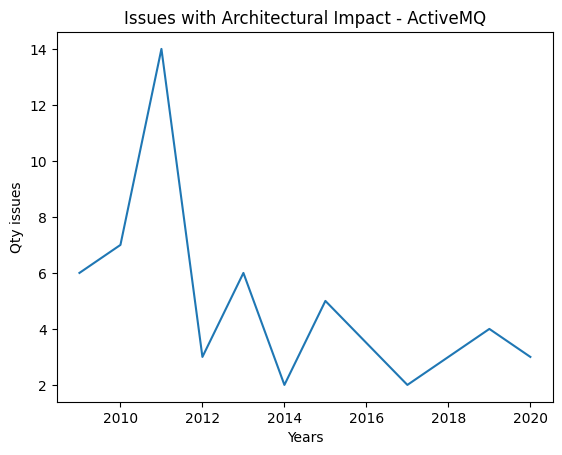

In [124]:
anos_am = df_active_mq_iaiyes_by_year.year
qtd_issues_am = df_active_mq_iaiyes_by_year.issues_count

# Exemplo de uso da classe Gráfico
grafico_activemq_issues = GraficoSerieTemporal()
grafico_activemq_issues.set_eixo_x(x=anos_am)
grafico_activemq_issues.set_eixo_y(y=qtd_issues_am)
grafico_activemq_issues.configura_titulo_e_rotulos(titulo='Issues with Architectural Impact - ActiveMQ', rotulo_x='Years', rotulo_y='Qty issues')
grafico_activemq_issues.exibir_gráfico()

## Kafka

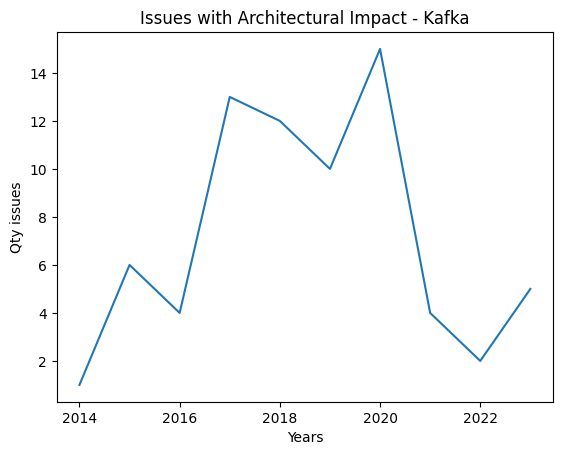

In [125]:
df_kiccc = df_kafka_issues_commits_critical_classes[['issue_key', 'created_date']]
df1k = df_kiccc.copy()

df_kii_yes = df_kafka_issues_inspected[df_kafka_issues_inspected['architectural_impact'] == 'YES']
df_kii_yes = df_kii_yes[['issue_key', 'summary']]
df2k = df_kii_yes.copy()

# Merge DataFrames by Column
df3k=pd.merge(df1k,df2k, on='issue_key')

df3k['year'] = pd.to_datetime(df3k['created_date']).dt.year

issues_per_year_k = df3k.groupby(['year']).size()
new_df_k = issues_per_year_k.to_frame(name='issues_count').reset_index()
df_kafka_iaiyes_by_year = new_df_k.copy()

anos_k = df_kafka_iaiyes_by_year.year
qtd_issues_k = df_kafka_iaiyes_by_year.issues_count

# Exemplo de uso da classe Gráfico
grafico_kafka_issues = GraficoSerieTemporal()
grafico_kafka_issues.set_eixo_x(x=anos_k)
grafico_kafka_issues.set_eixo_y(y=qtd_issues_k)
grafico_kafka_issues.configura_titulo_e_rotulos(titulo='Issues with Architectural Impact - Kafka', rotulo_x='Years', rotulo_y='Qty issues')
grafico_kafka_issues.exibir_gráfico()

## Hadoop

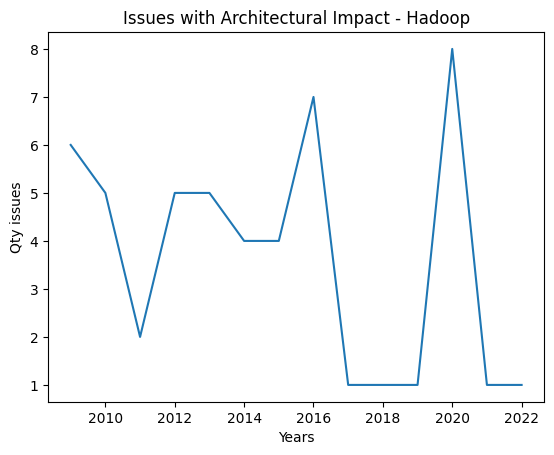

In [126]:
df_hiccc = df_hadoop_issues_commits_critical_classes[['issue_key', 'created_date']]
df1h = df_hiccc.copy()

df_hii_yes = df_hadoop_issues_inspected[df_hadoop_issues_inspected['architectural_impact'] == 'YES']
df_hii_yes = df_hii_yes[['issue_key', 'summary']]
df2h = df_hii_yes.copy()

# Merge DataFrames by Column
df3h=pd.merge(df1h,df2h, on='issue_key')

df3h['year'] = pd.to_datetime(df3h['created_date']).dt.year

issues_per_year_h = df3h.groupby(['year']).size()
new_df_h = issues_per_year_h.to_frame(name='issues_count').reset_index()
df_hadoop_iaiyes_by_year = new_df_h.copy()

anos_h = df_hadoop_iaiyes_by_year.year
qtd_issues_h = df_hadoop_iaiyes_by_year.issues_count

# Exemplo de uso da classe Gráfico
grafico_hadoop_issues = GraficoSerieTemporal()
grafico_hadoop_issues.set_eixo_x(x=anos_h)
grafico_hadoop_issues.set_eixo_y(y=qtd_issues_h)
grafico_hadoop_issues.configura_titulo_e_rotulos(titulo='Issues with Architectural Impact - Hadoop', rotulo_x='Years', rotulo_y='Qty issues')
grafico_hadoop_issues.exibir_gráfico()

## Gráficos sobrescritos:

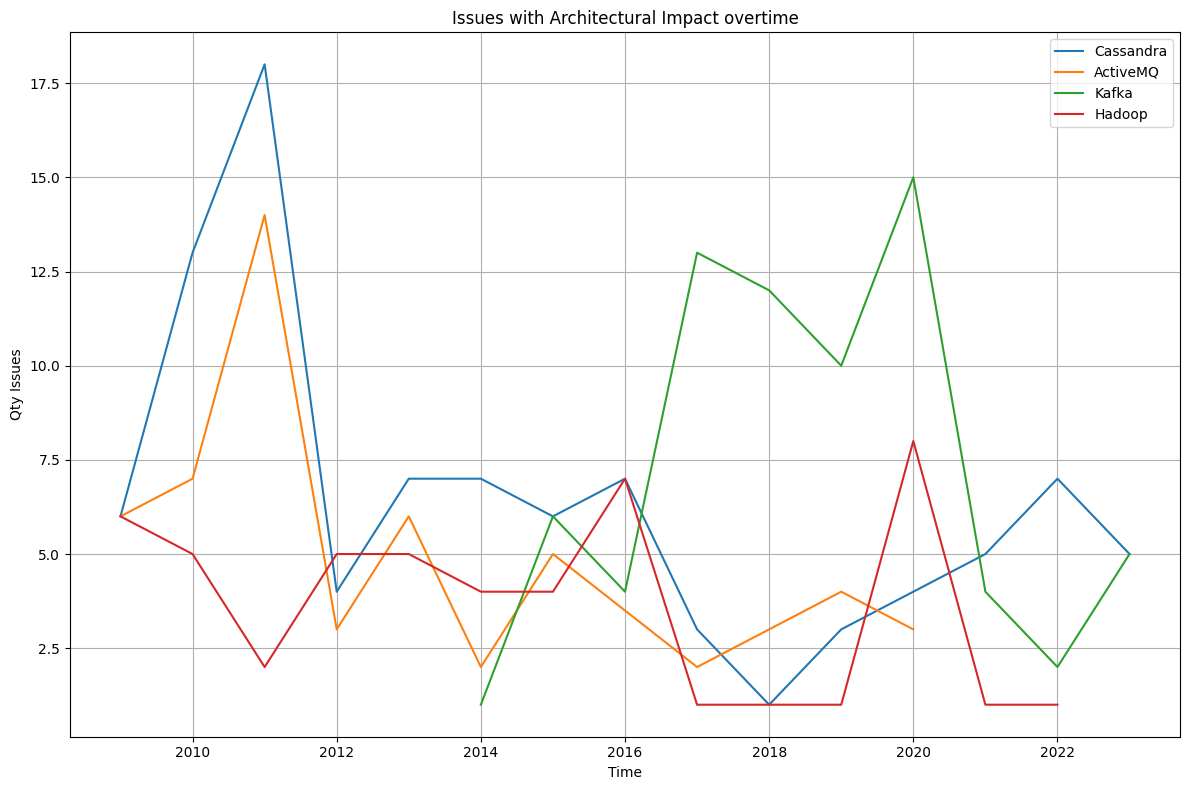

In [132]:
fig, ax = plt.subplots(figsize=(12, 8))  # Adjust figsize as needed

# Assuming you have data in lists:
x1 = anos
y1 = qtd_issues
x2 = anos_am
y2 = qtd_issues_am
x3 = anos_k
y3 = qtd_issues_k
x4 = anos_h
y4 = qtd_issues_h
# ... and so on for other time series

ax.plot(x1, y1, label='Cassandra')
ax.plot(x2, y2, label='ActiveMQ')
ax.plot(x3, y3, label='Kafka')
ax.plot(x4, y4, label='Hadoop')

ax.set_xlabel('Time')  # Set x-axis label
ax.set_ylabel('Qty Issues')  # Set y-axis label
ax.set_title('Issues with Architectural Impact overtime')  # Add a title
ax.legend()  # Show the legend
plt.grid(True)  # Add grid lines
plt.tight_layout()  # Adjust spacing

plt.show()  # Display the plot